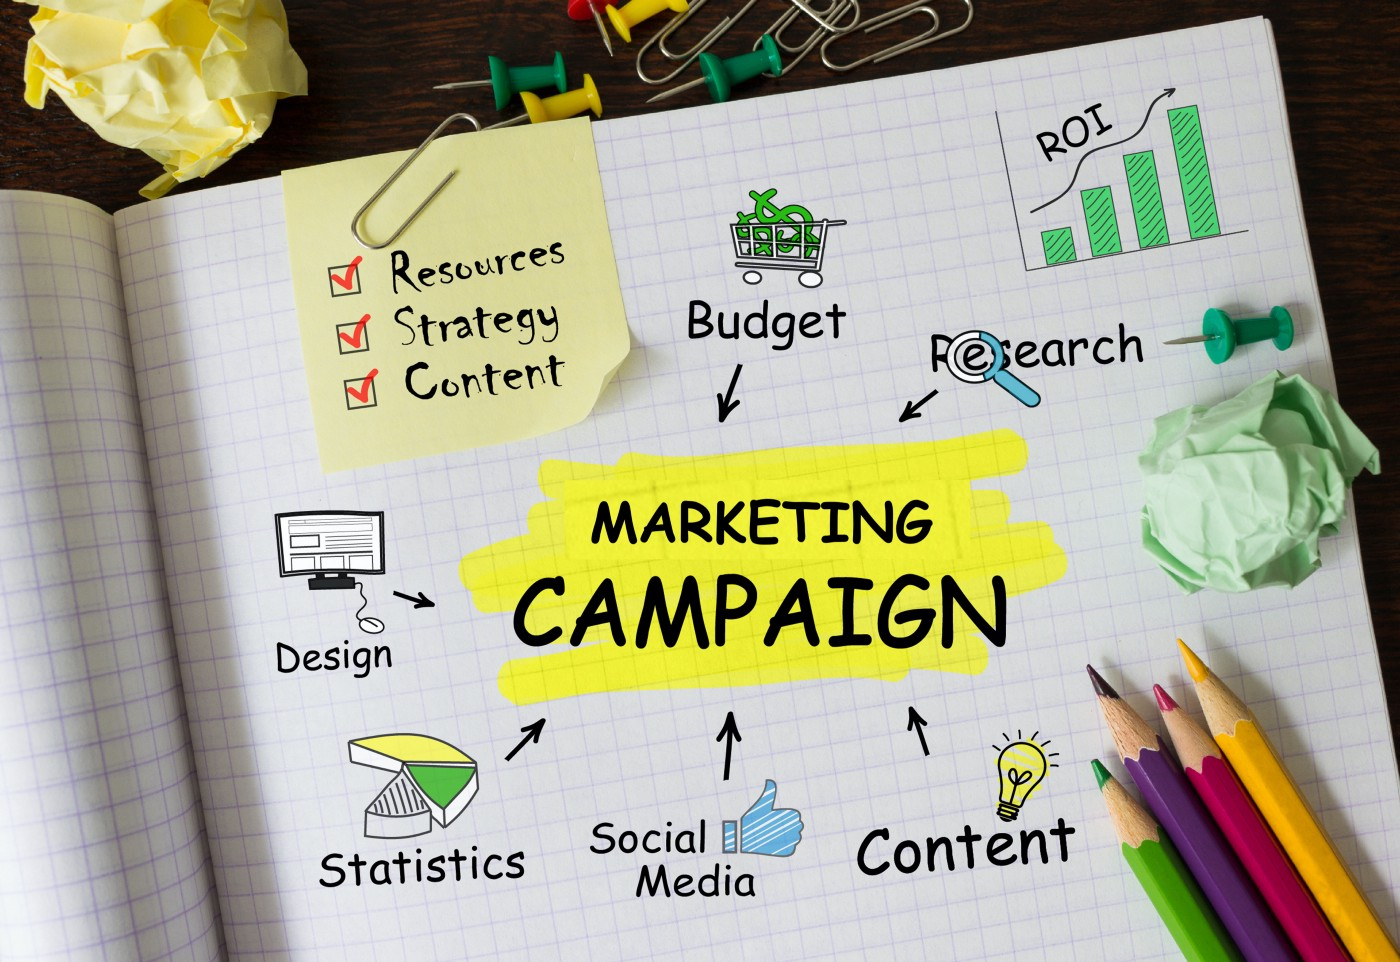

In [1]:
from IPython.display import Image
display(Image(filename='campaign.jpeg'))

**Group G members:**
 - Anoop Remanan Syamala
 - Jiyoung You
 - Kenneth Wu

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
import re

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

warnings.filterwarnings("ignore")

## Context

### Problem Statement

- **Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.**

- **Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.**

### This machine learning project for the extra credits has been divided into two sections
 **Part 1 includes a high-level overview of data analysis followed by using supervised machine learning techniques to capture the `target` variable that is `Response`.
 Part 2 includes clustering to summarize customer segments.**
    

## Part 1: Supervised Machine learning

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep = '\t', index_col = 'ID', parse_dates = ['Dt_Customer'])

In [3]:
df.head(10)

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                        
5524        1957  Graduation         Single  58138.0        0         0   
2174        1954  Graduation         Single  46344.0        1         1   
4141        1965  Graduation       Together  71613.0        0         0   
6182        1984  Graduation       Together  26646.0        1         0   
5324        1981         PhD        Married  58293.0        1         0   
7446        1967      Master       Together  62513.0        0         1   
965         1971  Graduation       Divorced  55635.0        0         1   
6177        1985         PhD        Married  33454.0        1         0   
4855        1974         PhD       Together  30351.0        1         0   
5899        1950         PhD       Together   5648.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                
5524  2012-04-09       58       635         88              546   
2174  2014-08-03       38        11          1                6   
4141  2013-08-21       26       426         49              127   
6182  2014-10-02       26        11          4               20   
5324  2014-01-19       94       173         43              118   
7446  2013-09-09       16       520         42               98   
965   2012-11-13       34       235         65              164   
6177  2013-08-05       32        76         10               56   
4855  2013-06-06       19        14          0               24   
5899  2014-03-13       68        28          0                6   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                         
5524              172                88            88                  3   
2174                2                 1             6                  2   
4141              111                21            42                  1   
6182               10                 3             5                  2   
5324               46                27            15                  5   
7446                0                42            14                  2   
965                50                49            27                  4   
6177                3                 1            23                  2   
4855                3                 3             2                  1   
5899                1                 1            13                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                              
5524                8                   10                  4   
2174                1                    1                  2   
4141                8                    2                 10   
6182                2                    0                  4   
5324                5                    3                  6   
7446                6                    4                 10   
965                 7                    3                  7   
6177                4                    0                  4   
4855                3                    0                  2   
5899                1                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                  
5524                  7             0             0             0   
2174                  5             0             0             0   
4141                  4             0             0             0   
6182                  6             0             0             0   
5324                  5             0             0             0   
7446                  6             0             0             0   
965                   6             0             0   

In [4]:
df.shape

(2240, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-

In [6]:
df.describe(include="all").T

count unique                  top  freq      first  \
Year_Birth           2240.0    NaN                  NaN   NaN        NaT   
Education              2240      5           Graduation  1127        NaT   
Marital_Status         2240      8              Married   864        NaT   
Income               2216.0    NaN                  NaN   NaN        NaT   
Kidhome              2240.0    NaN                  NaN   NaN        NaT   
Teenhome             2240.0    NaN                  NaN   NaN        NaT   
Dt_Customer            2240    663  2012-08-31 00:00:00    12 2012-01-08   
Recency              2240.0    NaN                  NaN   NaN        NaT   
MntWines             2240.0    NaN                  NaN   NaN        NaT   
MntFruits            2240.0    NaN                  NaN   NaN        NaT   
MntMeatProducts      2240.0    NaN                  NaN   NaN        NaT   
MntFishProducts      2240.0    NaN                  NaN   NaN        NaT   
MntSweetProducts     2240.0    NaN                  NaN   NaN        NaT   
MntGoldProds         2240.0    NaN                  NaN   NaN        NaT   
NumDealsPurchases    2240.0    NaN                  NaN   NaN        NaT   
NumWebPurchases      2240.0    NaN                  NaN   NaN        NaT   
NumCatalogPurchases  2240.0    NaN                  NaN   NaN        NaT   
NumStorePurchases    2240.0    NaN                  NaN   NaN        NaT   
NumWebVisitsMonth    2240.0    NaN                  NaN   NaN        NaT   
AcceptedCmp3         2240.0    NaN                  NaN   NaN        NaT   
AcceptedCmp4         2240.0    NaN                  NaN   NaN        NaT   
AcceptedCmp5         2240.0    NaN                  NaN   NaN        NaT   
AcceptedCmp1         2240.0    NaN                  NaN   NaN        NaT   
AcceptedCmp2         2240.0    NaN                  NaN   NaN        NaT   
Complain             2240.0    NaN                  NaN   NaN        NaT   
Z_CostContact        2240.0    NaN                  NaN   NaN        NaT   
Z_Revenue            2240.0    NaN                  NaN   NaN        NaT   
Response             2240.0    NaN                  NaN   NaN        NaT   

                          last          mean           std     min      25%  \
Year_Birth                 NaT   1968.805804     11.984069  1893.0   1959.0   
Education                  NaT           NaN           NaN     NaN      NaN   
Marital_Status             NaT           NaN           NaN     NaN      NaN   
Income                     NaT  52247.251354  25173.076661  1730.0  35303.0   
Kidhome                    NaT      0.444196      0.538398     0.0      0.0   
Teenhome                   NaT       0.50625      0.544538     0.0      0.0   
Dt_Customer         2014-12-06           NaN           NaN     NaN      NaN   
Recency                    NaT     49.109375     28.962453     0.0     24.0   
MntWines                   NaT    303.935714    336.597393     0.0    23.75   
MntFruits                  NaT     26.302232     39.773434     0.0      1.0   
MntMeatProducts            NaT        166.95    225.715373     0.0     16.0   
MntFishProducts            NaT     37.525446     54.628979     0.0      3.0   
MntSweetProducts           NaT     27.062946     41.280498     0.0      1.0   
MntGoldProds               NaT     44.021875     52.167439     0.0      9.0   
NumDealsPurchases          NaT         2.325      1.932238     0.0      1.0   
NumWebPurchases            NaT      4.084821      2.778714     0.0      2.0   
NumCatalogPurchases        NaT      2.662054      2.923101     0.0      0.0   
NumStorePurchases          NaT      5.790179      3.250958     0.0      3.0   
NumWebVisitsMonth          NaT      5.316518      2.426645     0.0      3.0   
AcceptedCmp3               NaT      0.072768      0.259813     0.0      0.0   
AcceptedCmp4               NaT      0.074554      0.262728     0.0      0.0   
AcceptedCmp5               NaT      0.072768      0.259813     0.0      0.0   


In [7]:
df.duplicated().sum()

182

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.17
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Z_CostContact          0.00
Z_Revenue              0.00
Response               0.00
dtype: float64

In [10]:
#Finding the number of null entries in each column.
for i in df.columns:
    num = df[i].isnull().sum()
    if num != 0:
        print(i + " has {} null values.".format(num))
        print()

Income has 24 null values.



<AxesSubplot:ylabel='ID'>

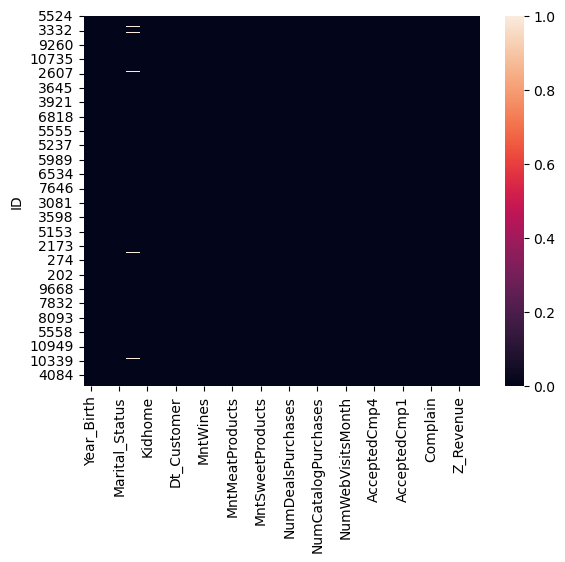

In [11]:
sns.heatmap(df.isnull())

In [12]:
#converting to date time object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%Y')
df['Dt_Customer'].describe()

count                    2058
unique                    663
top       2014-12-05 00:00:00
freq                       10
first     2012-01-08 00:00:00
last      2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

In [15]:
from datetime import date

In [16]:
# Define a function to calculate age from birth year
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# Apply the function to create the "Age" column
df["Age"] = df["Year_Birth"].apply(lambda x: calculate_age(date(x, 1, 1)))

# Sort the "Age" column in ascending order
df["Age"] = df["Age"].sort_values()
df.Age

ID
5524     66
2174     69
4141     58
6182     39
5324     42
         ..
9432     46
10870    56
7270     42
8235     67
9405     69
Name: Age, Length: 2058, dtype: int64

In [17]:
df[df["Age"] > 100]

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                       
7829         1900  2n Cycle       Divorced  36640.0        1         0   
11004        1893  2n Cycle         Single  60182.0        0         1   
1150         1899       PhD       Together  83532.0        0         0   

      Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                 
7829   2013-09-26       99        15          6                8   
11004  2014-05-17       23         8          0                5   
1150   2013-09-26       36       755        144              562   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                          
7829                 7                 4            25                  1   
11004                7                 0             2                  1   
1150               104                64           224                  1   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                               
7829                 2                    1                  2   
11004                1                    0                  2   
1150                 4                    6                  4   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                   
7829                   5             0             0             0   
11004                  4             0             0             0   
1150                   1             0             0             1   

       AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
ID                                                                      
7829              0             0         1              3         11   
11004             0             0         0              3         11   
1150              0             0         0              3         11   

       Response  Age  
ID                    
7829          0  123  
11004         0  130  
1150          0  124

In [18]:
df.drop(df[df["Age"] > 100].index, inplace=True)

In [19]:
# Extracting registration year from the date
df["Registration_year"] = df["Dt_Customer"].apply(lambda x: x.year)

# Extracting registration month from the date
df["Registration_month"] = df["Dt_Customer"].apply(lambda x: x.month)

# Extracting registration week from the date
df["Registration_week"] = df["Dt_Customer"].apply(lambda x: x.day // 7)

In [20]:
df.head(5)

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                        
5524        1957  Graduation         Single  58138.0        0         0   
2174        1954  Graduation         Single  46344.0        1         1   
4141        1965  Graduation       Together  71613.0        0         0   
6182        1984  Graduation       Together  26646.0        1         0   
5324        1981         PhD        Married  58293.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                
5524  2012-04-09       58       635         88              546   
2174  2014-08-03       38        11          1                6   
4141  2013-08-21       26       426         49              127   
6182  2014-10-02       26        11          4               20   
5324  2014-01-19       94       173         43              118   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                         
5524              172                88            88                  3   
2174                2                 1             6                  2   
4141              111                21            42                  1   
6182               10                 3             5                  2   
5324               46                27            15                  5   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                              
5524                8                   10                  4   
2174                1                    1                  2   
4141                8                    2                 10   
6182                2                    0                  4   
5324                5                    3                  6   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                  
5524                  7             0             0             0   
2174                  5             0             0             0   
4141                  4             0             0             0   
6182                  6             0             0             0   
5324                  5             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
ID                                                                     
5524             0             0         0              3         11   
2174             0             0         0              3         11   
4141             0             0         0              3         11   
6182             0             0         0              3         11   
5324             0             0         0              3         11   

      Response  Age  Registration_year  Registration_month  Registration_week  
ID                                                                             
5524         1   66               2012                   4                  1  
2174         0   69               2014                   8                  0  
4141         0   58               2013                   8                  3  
6182         0   39               2014                  10                  0  
5324         0   42               2014                   1                  2

In [21]:
categorical_col = [
    "Education",
    "Marital_Status",
    "Kidhome",
    "Teenhome",
    "Complain",
    "Response",
    "Registration_year",
    "Registration_month",
    "Registration_week",
]

df[categorical_col].astype('category').apply(lambda x: x.cat.codes.value_counts())

Education  Marital_Status  Kidhome  Teenhome  Complain  Response  \
0       186.0             2.0   1182.0    1058.0    2036.0    1742.0   
1        49.0             3.0    830.0     947.0      19.0     313.0   
2      1030.0           215.0     43.0      50.0       NaN       NaN   
3       341.0           795.0      NaN       NaN       NaN       NaN   
4       449.0           447.0      NaN       NaN       NaN       NaN   
5         NaN           520.0      NaN       NaN       NaN       NaN   
6         NaN            71.0      NaN       NaN       NaN       NaN   
7         NaN             2.0      NaN       NaN       NaN       NaN   
8         NaN             NaN      NaN       NaN       NaN       NaN   
9         NaN             NaN      NaN       NaN       NaN       NaN   
10        NaN             NaN      NaN       NaN       NaN       NaN   
11        NaN             NaN      NaN       NaN       NaN       NaN   

    Registration_year  Registration_month  Registration_week  
0               452.0                 179              421.0  
1              1087.0                 167              479.0  
2               516.0                 190              463.0  
3                 NaN                 167              444.0  
4                 NaN                 177              248.0  
5                 NaN                 156                NaN  
6                 NaN                 130                NaN  
7                 NaN                 193                NaN  
8                 NaN                 153                NaN  
9                 NaN                 192                NaN  
10                NaN                 168                NaN  
11                NaN                 183                NaN

In [22]:
for col in categorical_col:
    print(df[col].value_counts())
    print("..." * 42)

Graduation    1030
PhD            449
Master         341
2n Cycle       186
Basic           49
Name: Education, dtype: int64
..............................................................................................................................
Married     795
Together    520
Single      447
Divorced    215
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
..............................................................................................................................
0    1182
1     830
2      43
Name: Kidhome, dtype: int64
..............................................................................................................................
0    1058
1     947
2      50
Name: Teenhome, dtype: int64
..............................................................................................................................
0    2036
1      19
Name: Complain, dtype: int64
......................................

In [23]:
# Replacing 2n Cycle with Master
df["Education"] = df["Education"].replace("2n Cycle", "Master")

In [24]:
# Replacing YOLO, Alone, Absurd with single and Together with Married
df["Marital_Status"] = df["Marital_Status"].replace(["YOLO", "Alone", "Absurd"], "Single")
df["Marital_Status"] = df["Marital_Status"].replace(["Together"], "Married")

In [25]:
df["Total_Amount_Spent"] = df[["MntWines", "MntFruits","MntMeatProducts", "MntFishProducts", "MntSweetProducts","MntGoldProds",]].sum(axis=1)

In [26]:
def draw_hist_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    fig, axs = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": [0.25, 0.75]},
        figsize=figsize
    )

    # create boxplot in the top subplot
    sns.boxplot(data=df, x=feature, showmeans=True, color="salmon", ax=axs[0])
    axs[0].set_xlabel('')  

    # create histogram in the bottom subplot
    sns.histplot(data=df, x=feature, kde=kde, bins=bins or 'auto', ax=axs[1])
    axs[1].set_ylabel('Frequency')

    # add mean and median lines to histogram
    axs[1].axvline(df[feature].mean(), color='green', linestyle='--', label='Mean')
    axs[1].axvline(df[feature].median(), color='black', linestyle='-', label='Median')
    axs[1].legend()

In [27]:
def draw_barplot(data, feature, perc=False, n=None):
    if n is None:
        n = data[feature].nunique()
    total = data[feature].count()
    order = data[feature].value_counts().index[:n]

    plt.figure(figsize=(n + 2, 6))
    ax = sns.countplot(data=data, x=feature, palette="rocket", order=order)
    plt.xticks(rotation=90, fontsize=15)

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")

    plt.show()

In [28]:
def draw_stacked_barplot(data, predictor, target):
    
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=predictor, hue=target, palette="cubehelix", dodge=False)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right", frameon=False)
    plt.show()

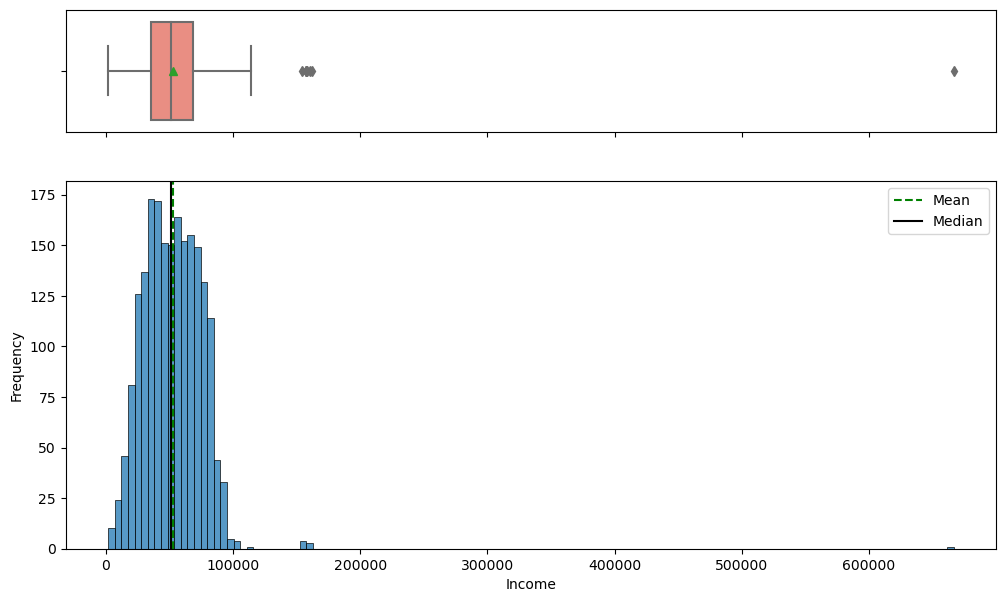

In [29]:
draw_hist_boxplot(data = df, feature = "Income")

There are some outliers as per the graph

In [30]:
df[df["Income"] > 200000]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
ID                                                                         
9432        1977  Graduation        Married  666666.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                
9432  2013-02-06       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                         
9432                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                              
9432                3                    1                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                  
9432                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
ID                                                                     
9432             0             0         0              3         11   

      Response  Age  Registration_year  Registration_month  Registration_week  \
ID                                                                              
9432         0   46               2013                   2                  0   

      Total_Amount_Spent  
ID                        
9432                  62

**Since it is only one observation, it is better to drop this observation to avoid overfitting**

In [31]:
df.drop(index=df[df.Income > 200000].index, inplace=True)

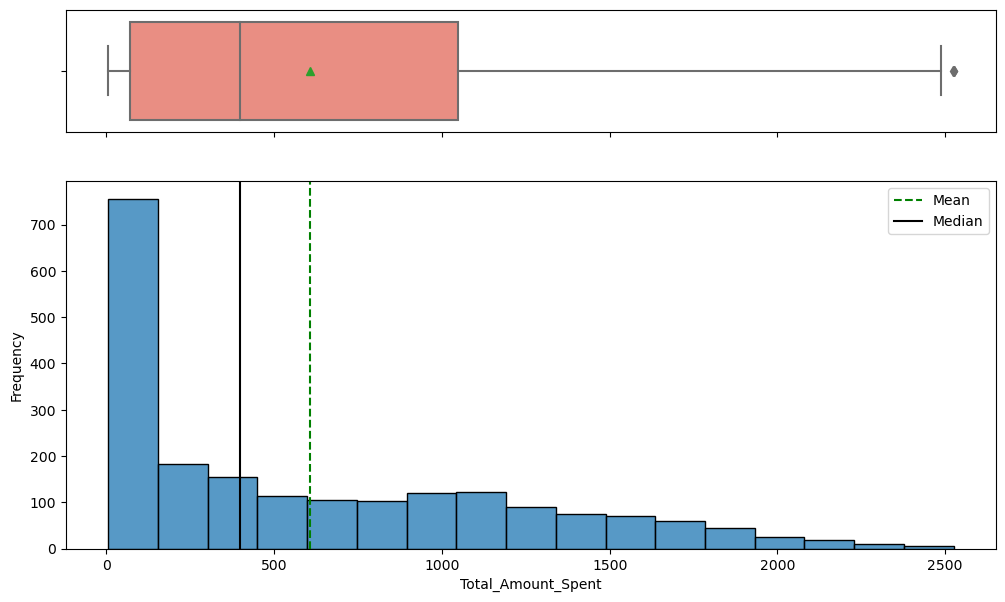

In [32]:
draw_hist_boxplot(data = df, feature = "Total_Amount_Spent")

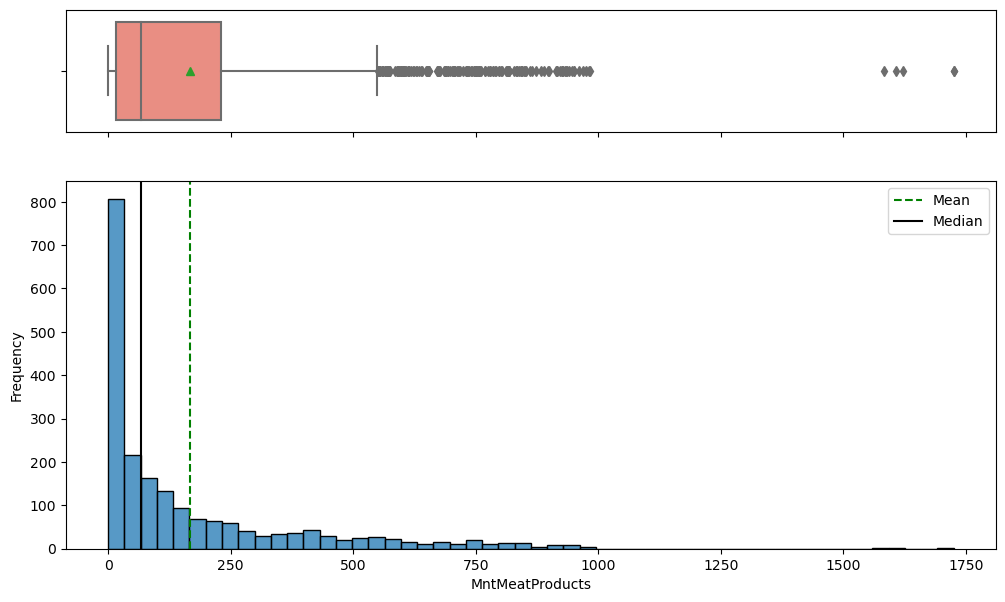

In [33]:
draw_hist_boxplot(data = df, feature = "MntMeatProducts")

In [34]:
df.sort_values('MntMeatProducts', ascending=False)['MntMeatProducts'].head(10)

ID
4931    1725
5376    1725
1501    1622
8720    1607
8475    1582
1065     984
1619     981
4947     974
3104     968
9220     961
Name: MntMeatProducts, dtype: int64

In [35]:
df[df["MntMeatProducts"] > 1580]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
ID                                                                         
5376        1979  Graduation        Married    2447.0        1         0   
8475        1973         PhD        Married  157243.0        0         1   
1501        1982         PhD        Married  160803.0        0         0   
4931        1977  Graduation        Married  157146.0        0         0   
8720        1978      Master        Married       NaN        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                
5376  2013-06-01       42         1          1             1725   
8475  2014-01-03       98        20          2             1582   
1501  2012-04-08       21        55         16             1622   
4931  2013-04-29       13         1          0             1725   
8720  2012-12-08       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                         
5376                1                 1             1                 15   
8475                1                 2             1                 15   
1501               17                 3             4                 15   
4931                2                 1             1                  0   
8720               12                 4            22                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                              
5376                0                   28                  0   
8475                0                   22                  0   
1501                0                   28                  1   
4931                0                   28                  0   
8720                0                    0                  1   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                  
5376                  1             0             0             0   
8475                  0             0             0             0   
1501                  0             0             0             0   
4931                  1             0             0             0   
8720                  0             0             1             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
ID                                                                     
5376             0             0         0              3         11   
8475             0             0         0              3         11   
1501             0             0         0              3         11   
4931             0             0         0              3         11   
8720             0             0         0              3         11   

      Response  Age  Registration_year  Registration_month  Registration_week  \
ID                                                                              
5376         0   44               2013                   6                  0   
8475         0   50               2014                   1                  0   
1501         0   41               2012                   4                  1   
4931         0   46               2013                   4                  4   
8720         0   45               2012                  12                  1   

      Total_Amount_Spent  
ID                        
5376                1730  
8475                1608  
1501                1717  
4931                1730  
8720                1679

In [36]:
limit_meat = 984
df["MntMeatProducts"] = df["MntMeatProducts"].where(df["MntMeatProducts"] <= limit_meat, limit_meat)

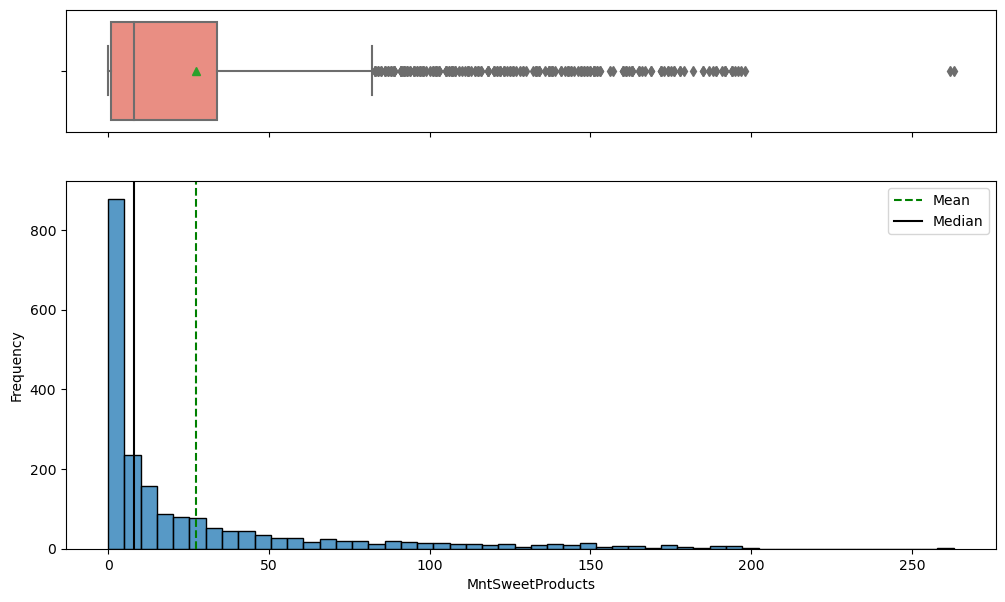

In [37]:
draw_hist_boxplot(data = df, feature = "MntSweetProducts")

In [38]:
df[df["MntSweetProducts"] > 200]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
ID                                                                         
5255        1986  Graduation         Single       NaN        1         0   
4619        1945         PhD         Single  113734.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                
5255  2013-02-20       19         5          1                3   
4619  2014-05-28        9         6          2                3   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                         
5255                3               263           362                  0   
4619                1               262             3                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                              
5255               27                    0                  0   
4619               27                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                  
5255                  1             0             0             0   
4619                  1             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
ID                                                                     
5255             0             0         0              3         11   
4619             0             0         0              3         11   

      Response  Age  Registration_year  Registration_month  Registration_week  \
ID                                                                              
5255         0   37               2013                   2                  2   
4619         0   78               2014                   5                  4   

      Total_Amount_Spent  
ID                        
5255                 637  
4619                 277

In [39]:
limit_sweet = 198
df["MntSweetProducts"] = df["MntSweetProducts"].where(df["MntSweetProducts"] <= limit_sweet, limit_sweet)

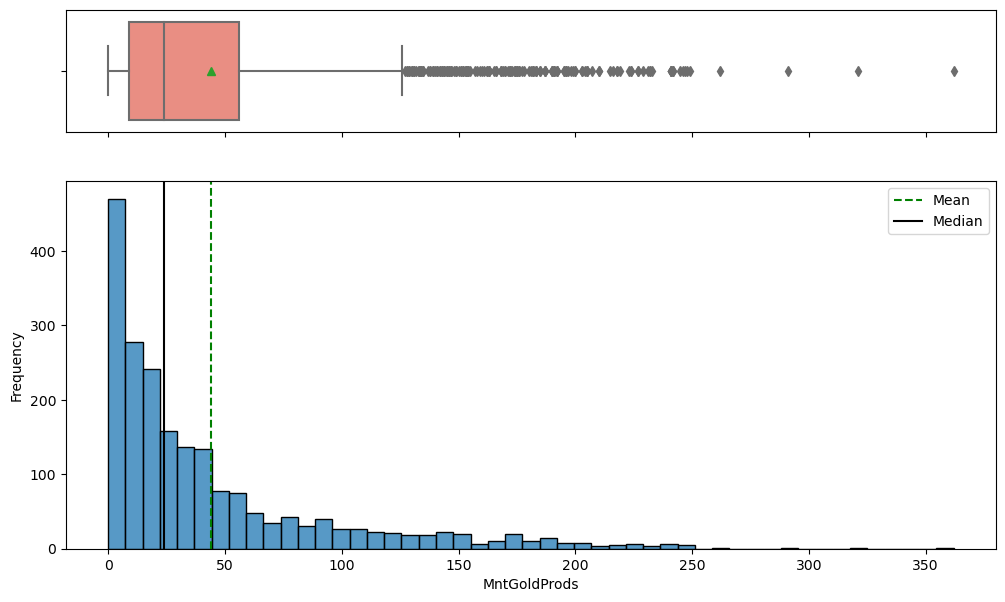

In [40]:
draw_hist_boxplot(data = df, feature = "MntGoldProds")

In [41]:
df[df["MntGoldProds"] > 250]

Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
ID                                                                        
5255         1986  Graduation         Single     NaN        1         0   
4246         1982      Master         Single  6560.0        0         0   
6237         1966         PhD         Single  7144.0        0         2   
10311        1969  Graduation        Married  4428.0        0         1   

      Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                 
5255   2013-02-20       19         5          1                3   
4246   2013-12-12        2        67         11               26   
6237   2013-07-12       92        81          4               33   
10311  2013-05-10        0        16          4               12   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                          
5255                 3               198           362                  0   
4246                 4                 3           262                  0   
6237                 5                 2           291                  0   
10311                2                 4           321                  0   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                               
5255                27                    0                  0   
4246                 1                    0                  1   
6237                23                    1                  1   
10311               25                    0                  0   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                   
5255                   1             0             0             0   
4246                  17             0             0             0   
6237                   0             0             0             0   
10311                  1             0             0             0   

       AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
ID                                                                      
5255              0             0         0              3         11   
4246              0             0         0              3         11   
6237              0             0         0              3         11   
10311             0             0         0              3         11   

       Response  Age  Registration_year  Registration_month  \
ID                                                            
5255          0   37               2013                   2   
4246          0   41               2013                  12   
6237          0   57               2013                   7   
10311         0   54               2013                   5   

       Registration_week  Total_Amount_Spent  
ID                                            
5255                   2                 637  
4246                   1                 373  
6237                   1                 416  
10311                  1                 359

In [42]:
limit_gold = 250
df["MntGoldProds"] = df["MntGoldProds"].where(df["MntGoldProds"] <= limit_gold, limit_gold)

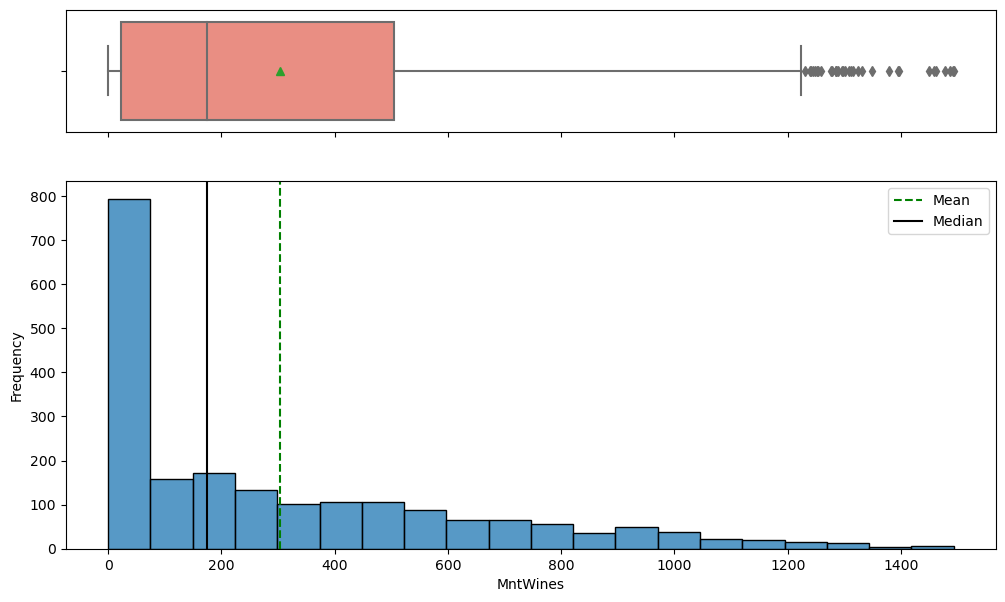

In [43]:
draw_hist_boxplot(data = df, feature = "MntWines")

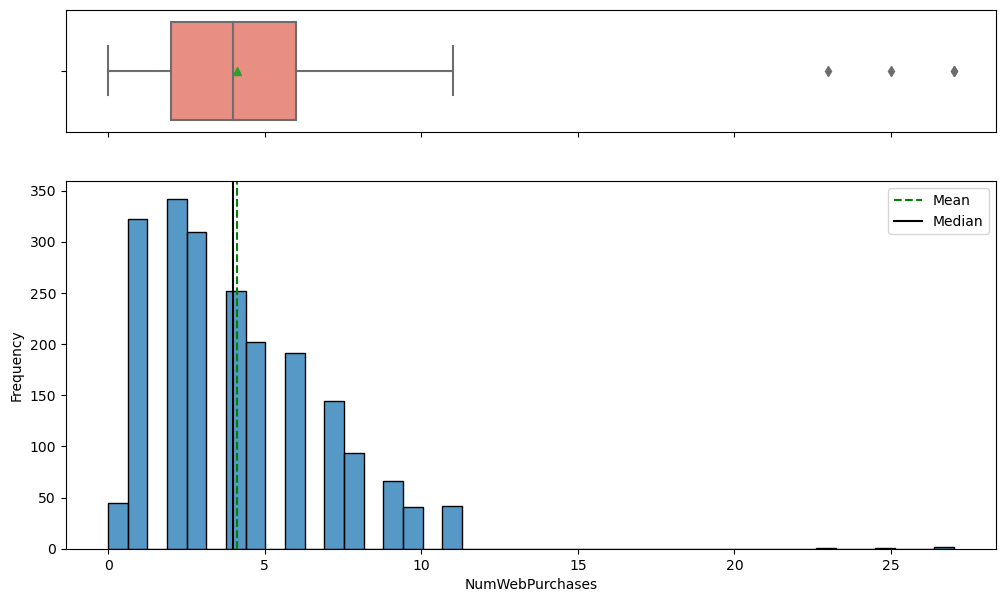

In [44]:
draw_hist_boxplot(data = df, feature = "NumWebPurchases")

In [45]:
limit_pur = 11
df["NumWebPurchases"] = df["NumWebPurchases"].where(df["NumWebPurchases"] <= limit_pur, limit_pur)

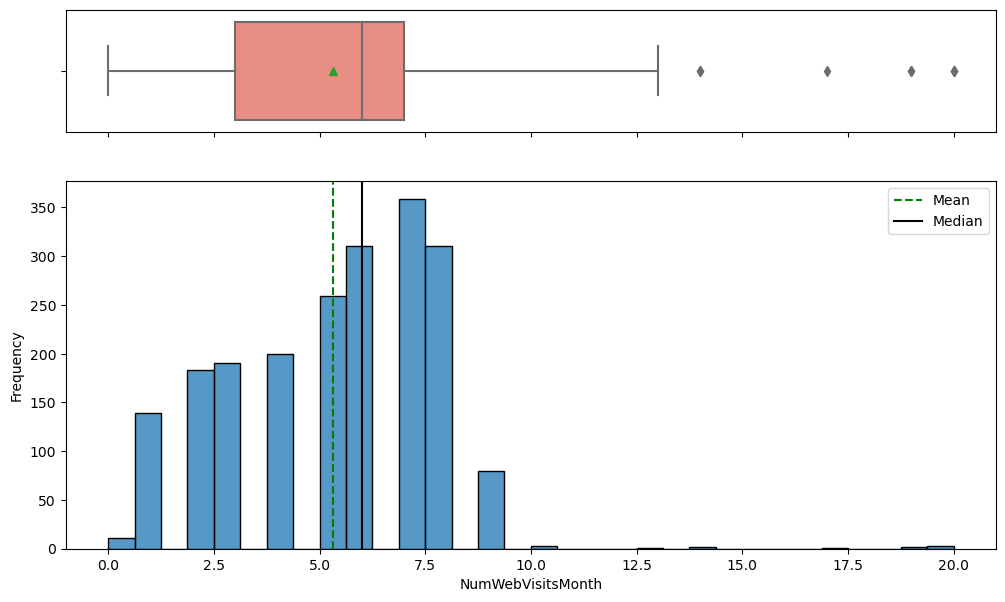

In [46]:
draw_hist_boxplot(data = df, feature = "NumWebVisitsMonth")

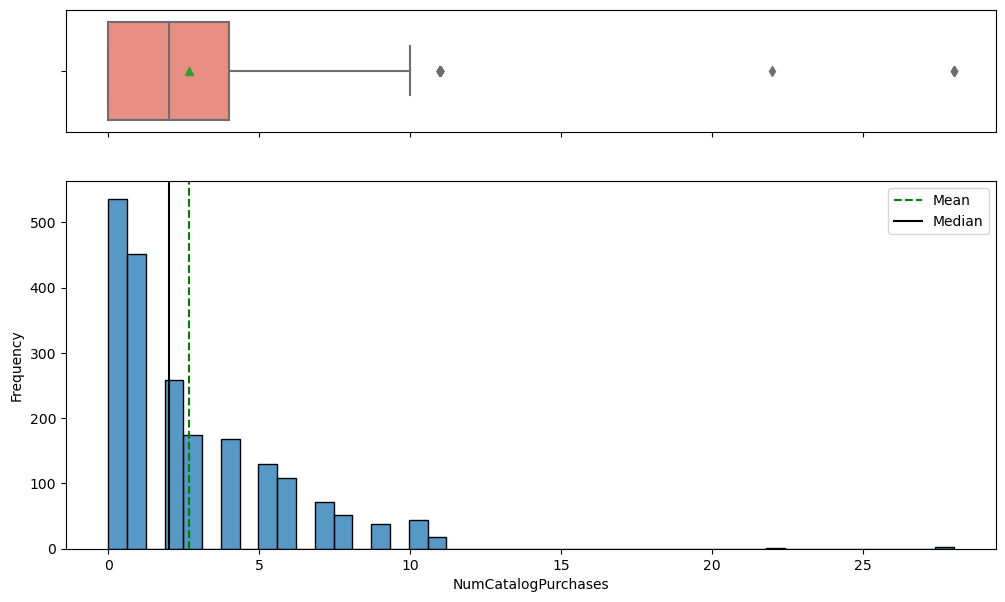

In [47]:
draw_hist_boxplot(data = df, feature = "NumCatalogPurchases")

In [48]:
df[df["NumCatalogPurchases"] > 15]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
ID                                                                         
5376        1979  Graduation        Married    2447.0        1         0   
8475        1973         PhD        Married  157243.0        0         1   
1501        1982         PhD        Married  160803.0        0         0   
4931        1977  Graduation        Married  157146.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                
5376  2013-06-01       42         1          1              984   
8475  2014-01-03       98        20          2              984   
1501  2012-04-08       21        55         16              984   
4931  2013-04-29       13         1          0              984   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                         
5376                1                 1             1                 15   
8475                1                 2             1                 15   
1501               17                 3             4                 15   
4931                2                 1             1                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                              
5376                0                   28                  0   
8475                0                   22                  0   
1501                0                   28                  1   
4931                0                   28                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                  
5376                  1             0             0             0   
8475                  0             0             0             0   
1501                  0             0             0             0   
4931                  1             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
ID                                                                     
5376             0             0         0              3         11   
8475             0             0         0              3         11   
1501             0             0         0              3         11   
4931             0             0         0              3         11   

      Response  Age  Registration_year  Registration_month  Registration_week  \
ID                                                                              
5376         0   44               2013                   6                  0   
8475         0   50               2014                   1                  0   
1501         0   41               2012                   4                  1   
4931         0   46               2013                   4                  4   

      Total_Amount_Spent  
ID                        
5376                1730  
8475                1608  
1501                1717  
4931                1730

In [49]:
limit_cat = 11
df["NumCatalogPurchases"] = df["NumCatalogPurchases"].where(df["NumCatalogPurchases"] <= limit_cat, limit_cat)

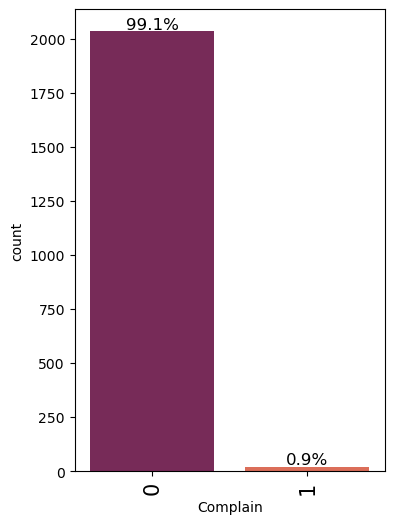

In [50]:
draw_barplot(data = df, feature = "Complain", perc=True)

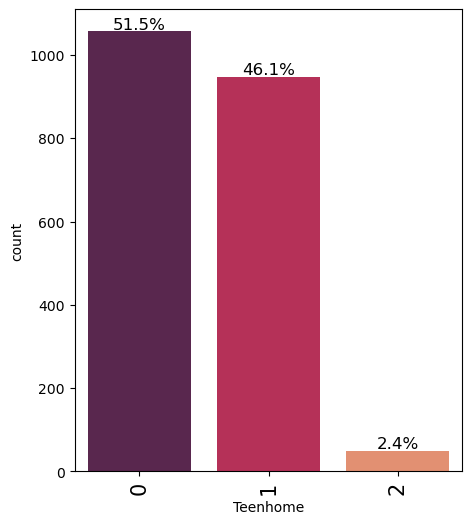

In [51]:
draw_barplot(data = df, feature = "Teenhome", perc=True)

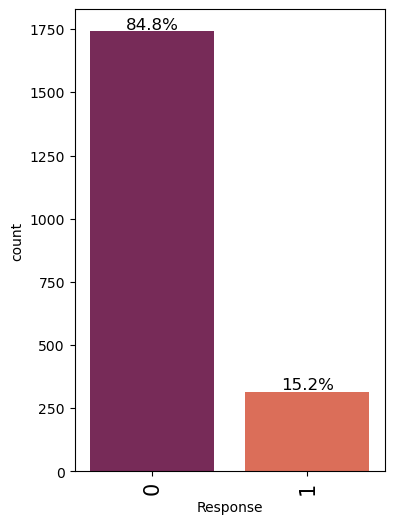

In [52]:
draw_barplot(data = df, feature = "Response", perc=True)

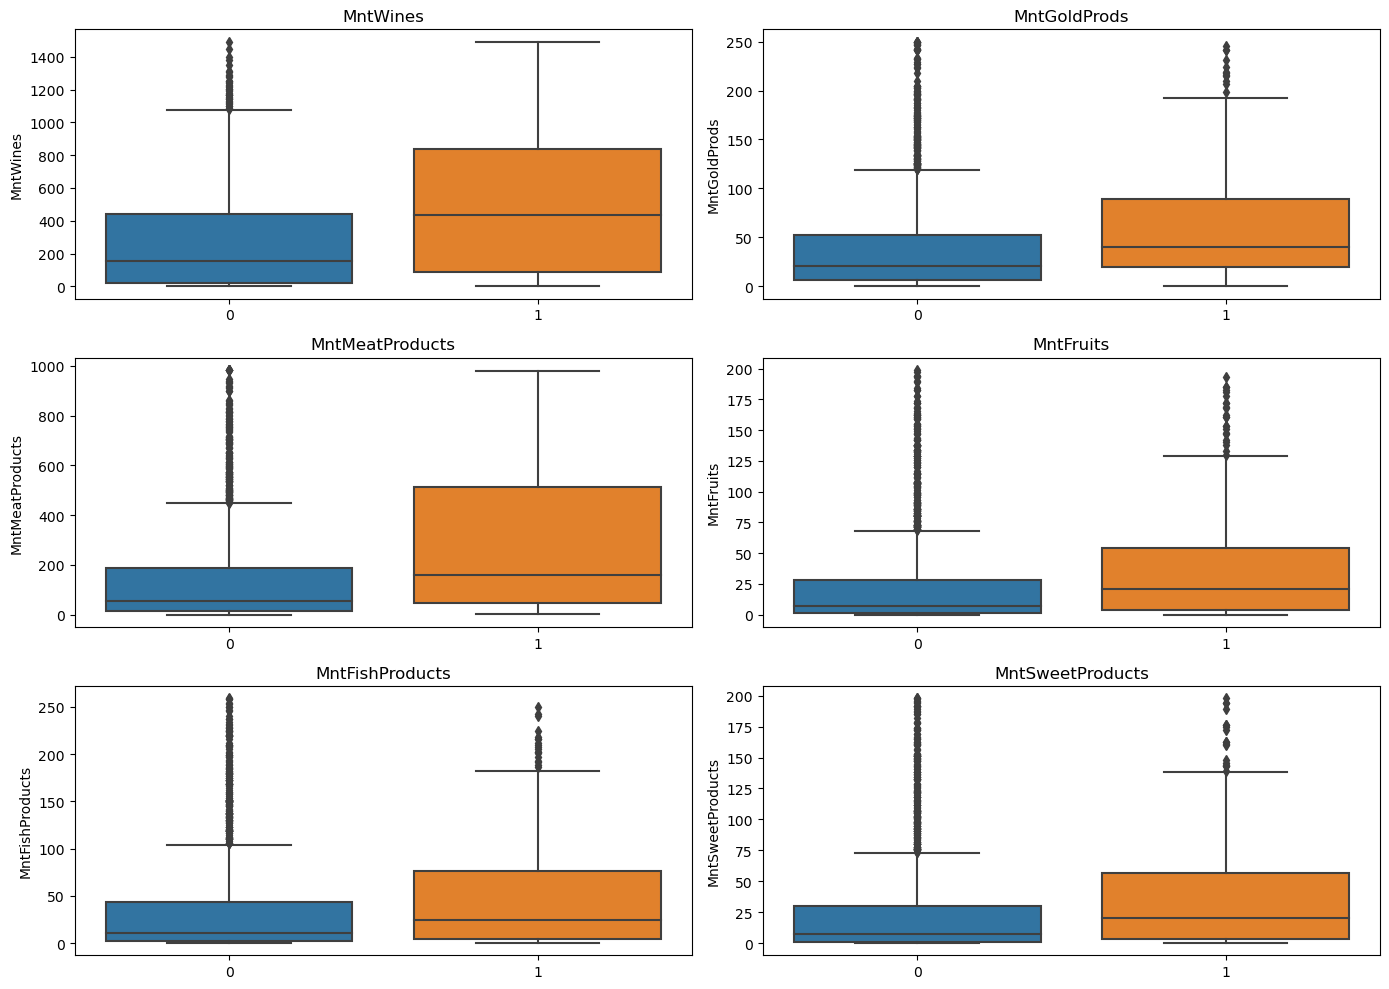

In [53]:
columns = ["MntWines", "MntGoldProds", "MntMeatProducts", "MntFruits", "MntFishProducts", "MntSweetProducts"]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

for i, ax in enumerate(axs.flat):
    sns.boxplot(df["Response"], df[columns[i]], ax=ax)
    ax.set_title(columns[i])
    ax.set_xlabel("")
    
plt.tight_layout()
plt.show()

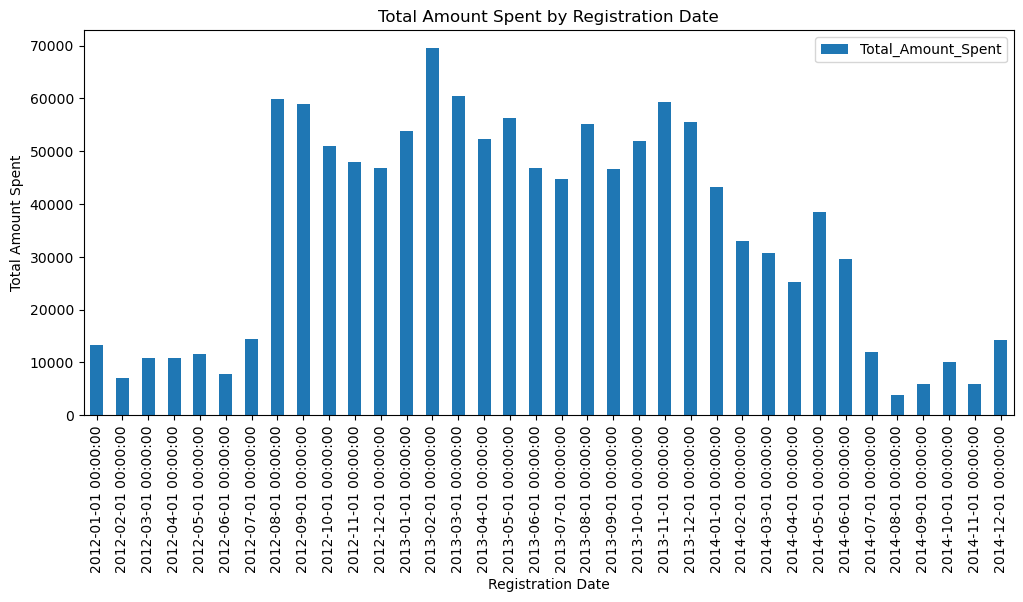

In [54]:
pivot_df = pd.pivot_table(
    data=df,
    index=["Registration_year", "Registration_month"],
    values="Total_Amount_Spent",
    aggfunc=np.sum,
).reset_index()

pivot_df["Registration_date"] = pd.to_datetime(pivot_df["Registration_year"].astype(str) + "-" + pivot_df["Registration_month"].astype(str))

pivot_df.plot(kind="bar", x="Registration_date", y="Total_Amount_Spent", stacked=True, figsize=(12, 5))
plt.xlabel("Registration Date")
plt.ylabel("Total Amount Spent")
plt.title("Total Amount Spent by Registration Date")
plt.show()

<AxesSubplot:xlabel='Income', ylabel='Total_Amount_Spent'>

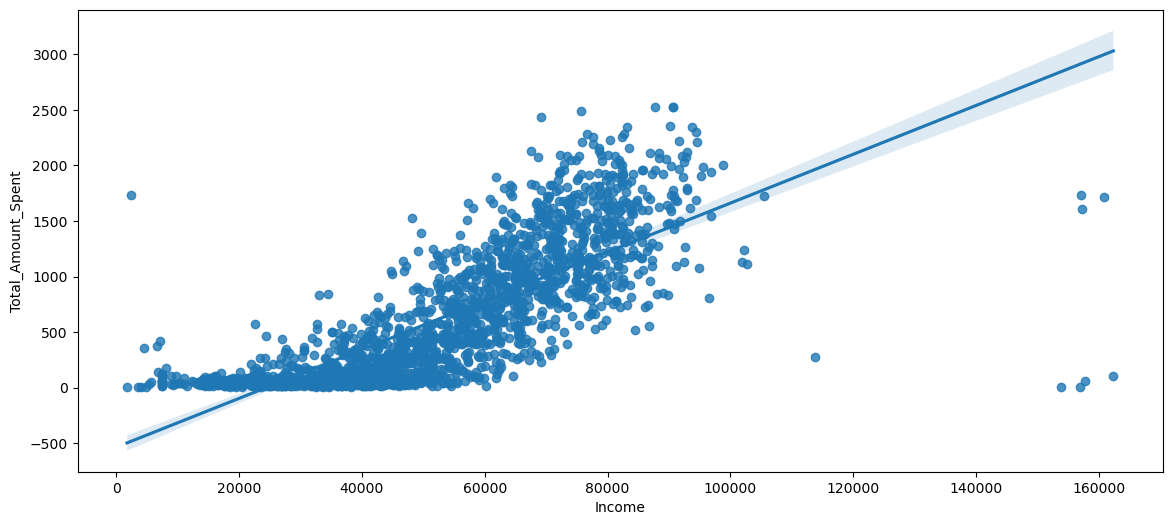

In [55]:
plt.figure(figsize=(14,6))
sns.regplot(y=df.Total_Amount_Spent, x=df.Income)

Shape of your Data Set loaded: (2240, 29)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    28 Predictors classified...
        3 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['ID', 'Z_CostContact', 'Z_Revenue']

################ Binary_Classification problem #####################


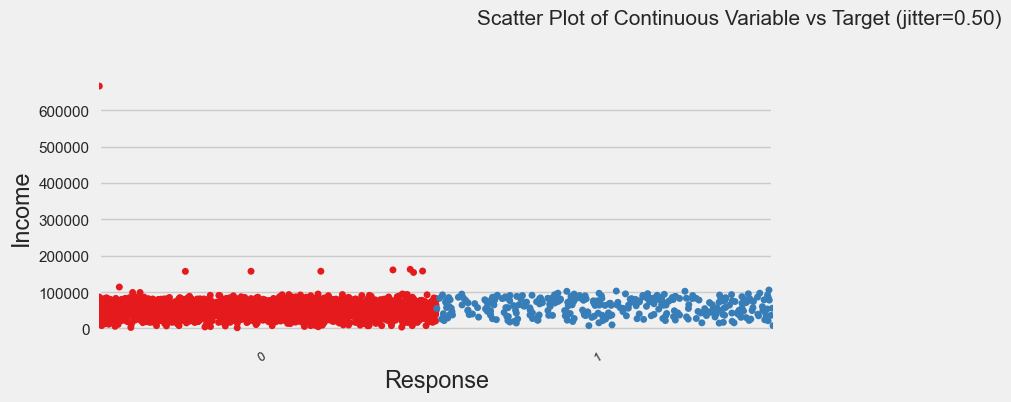

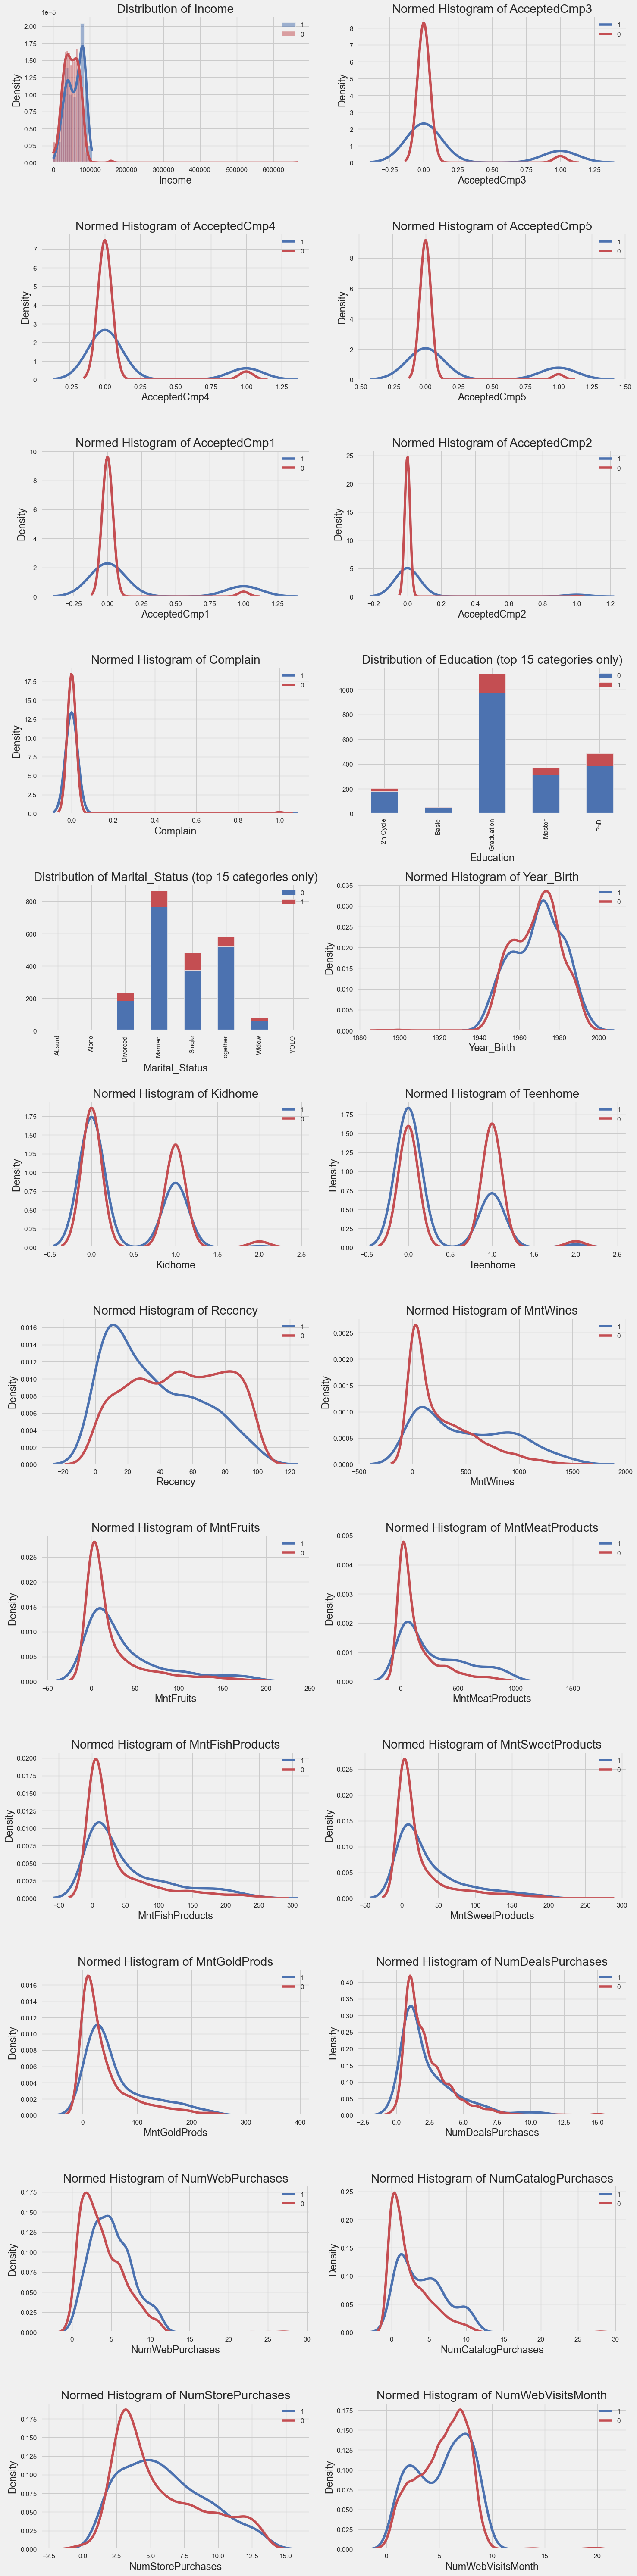

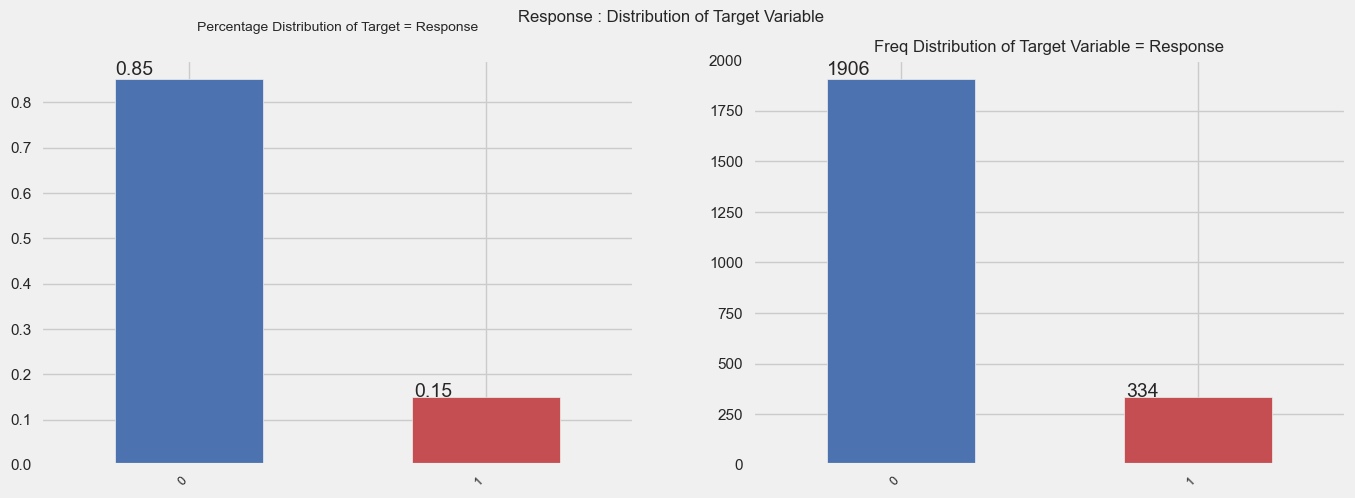

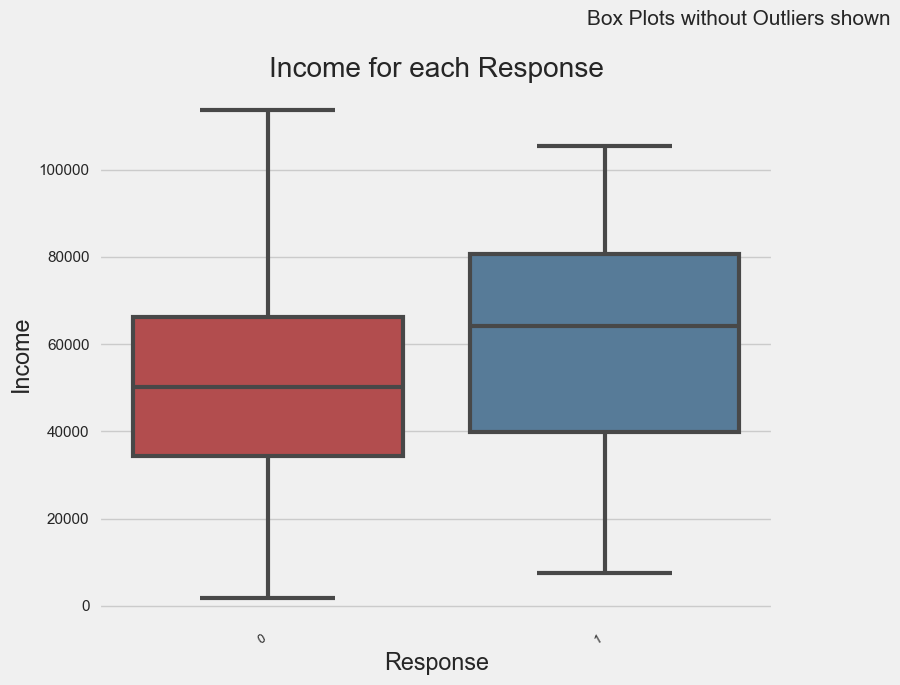

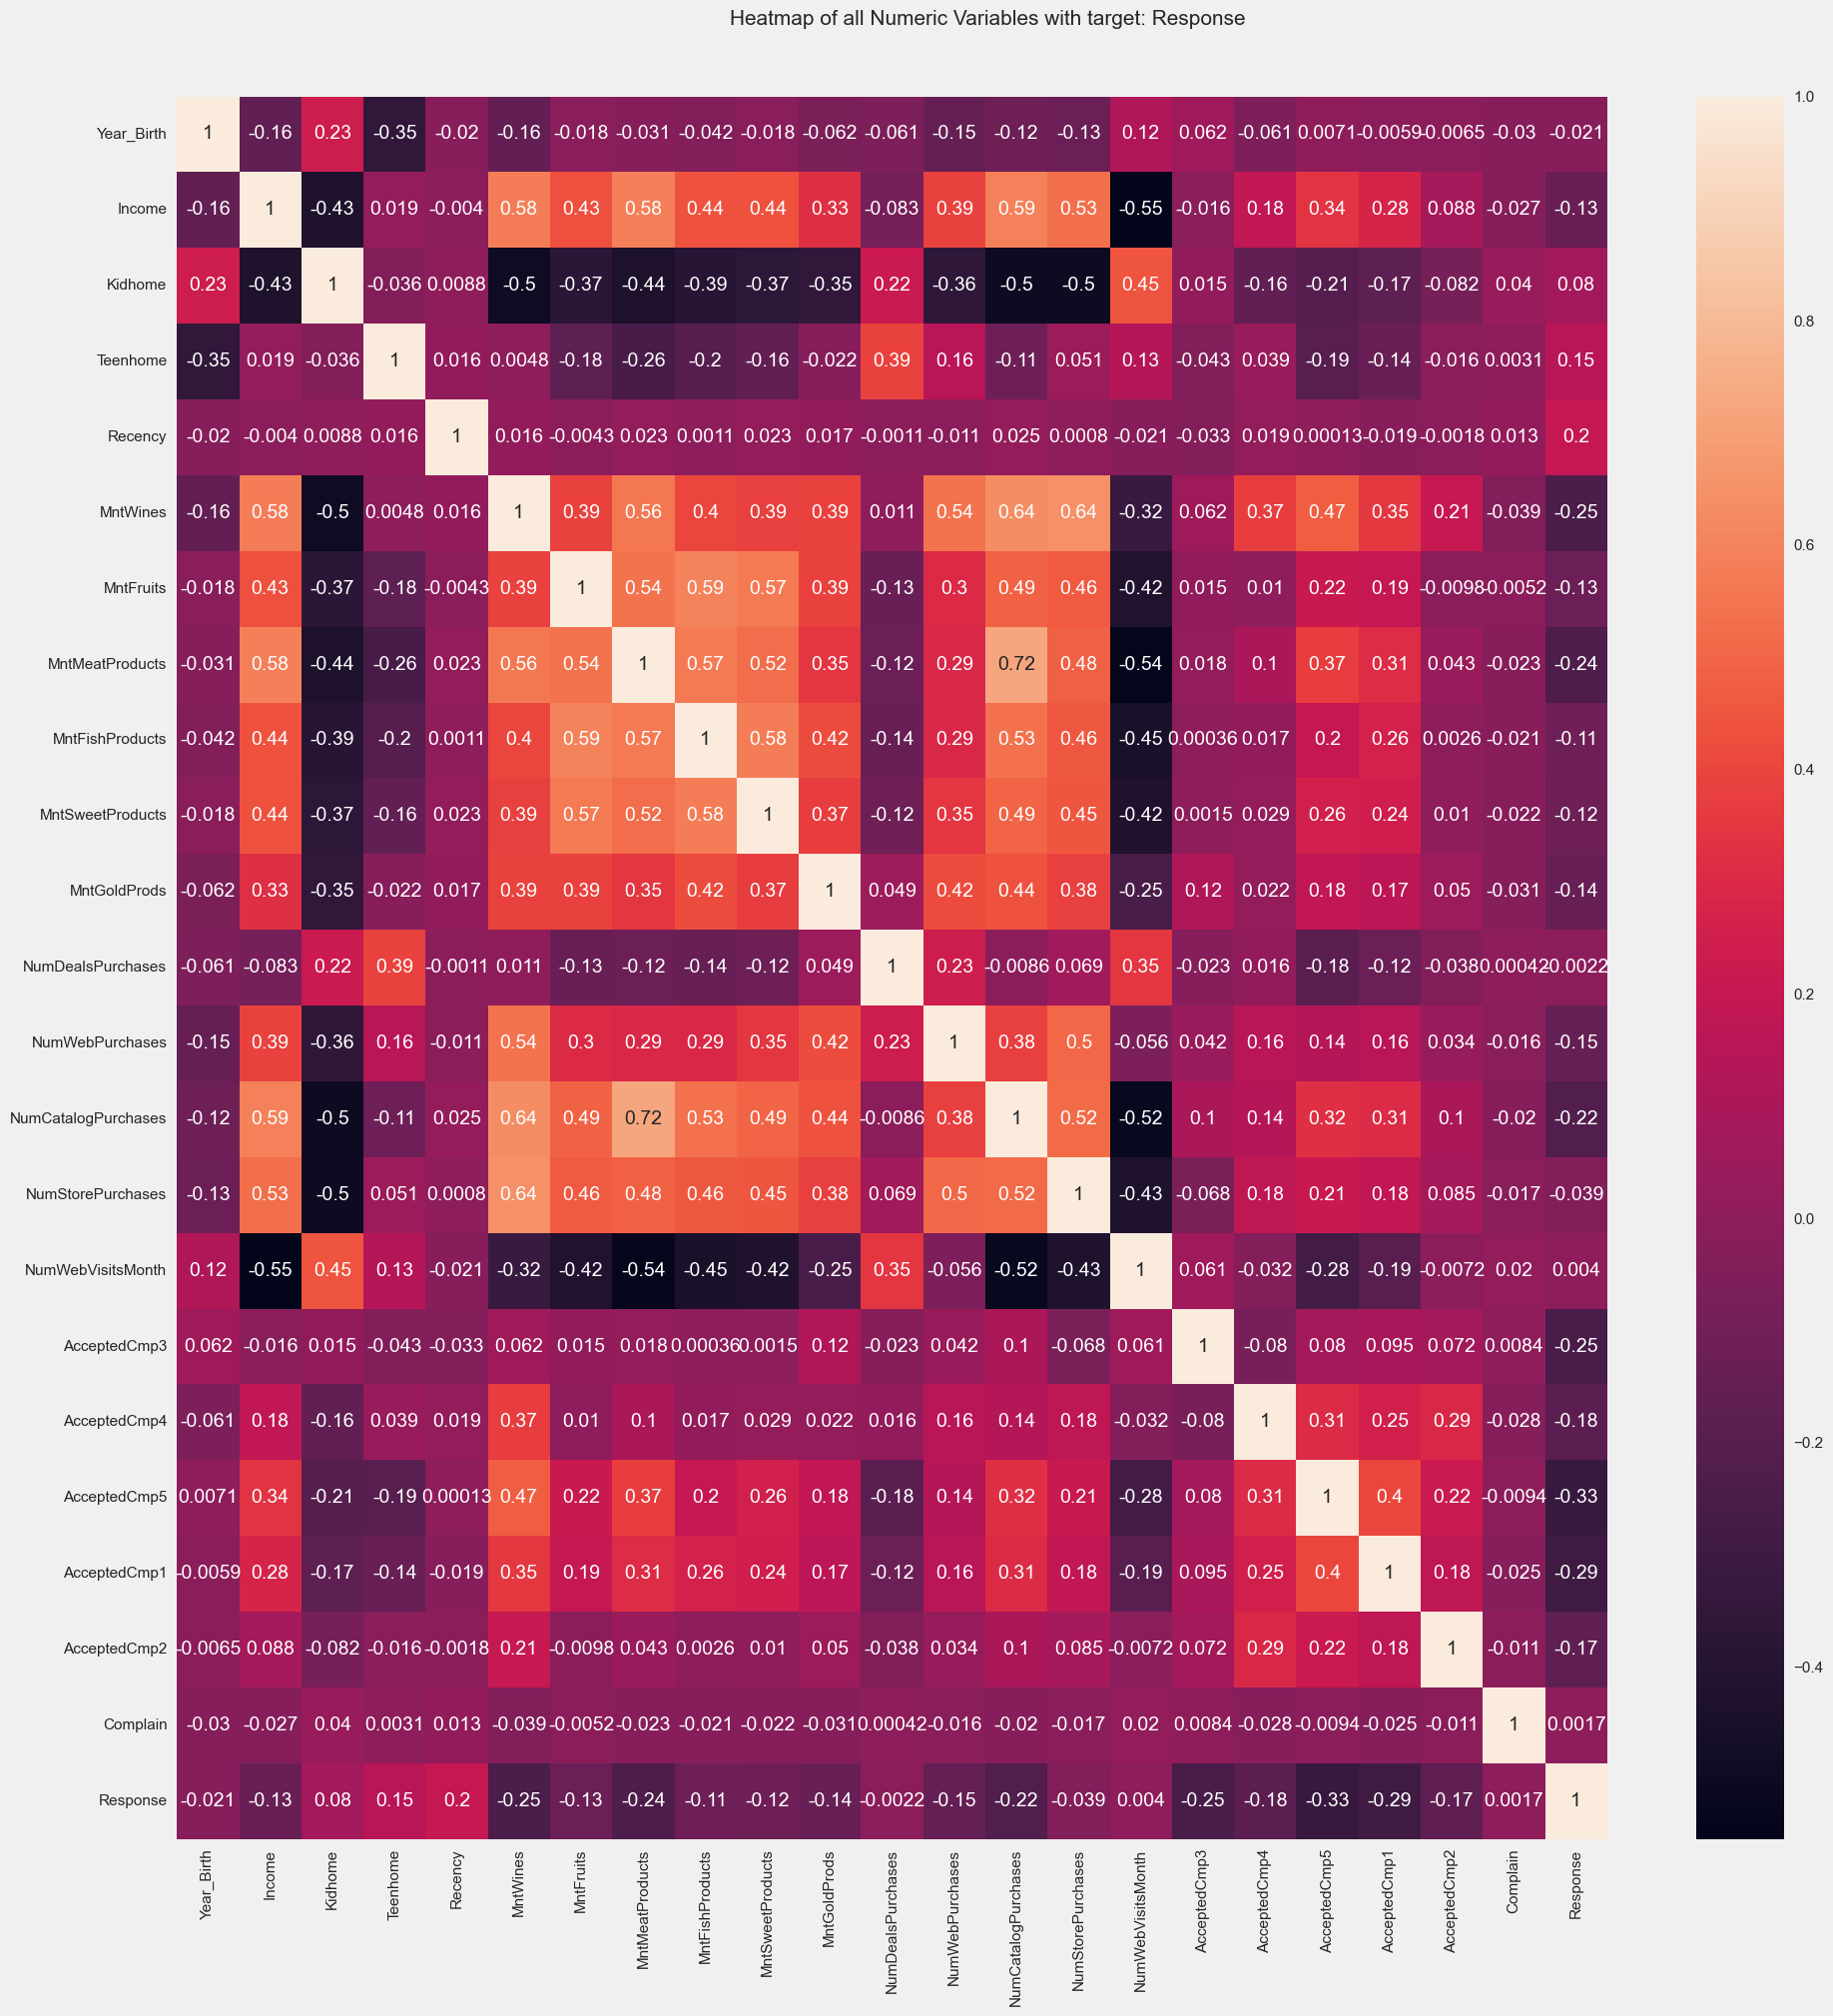

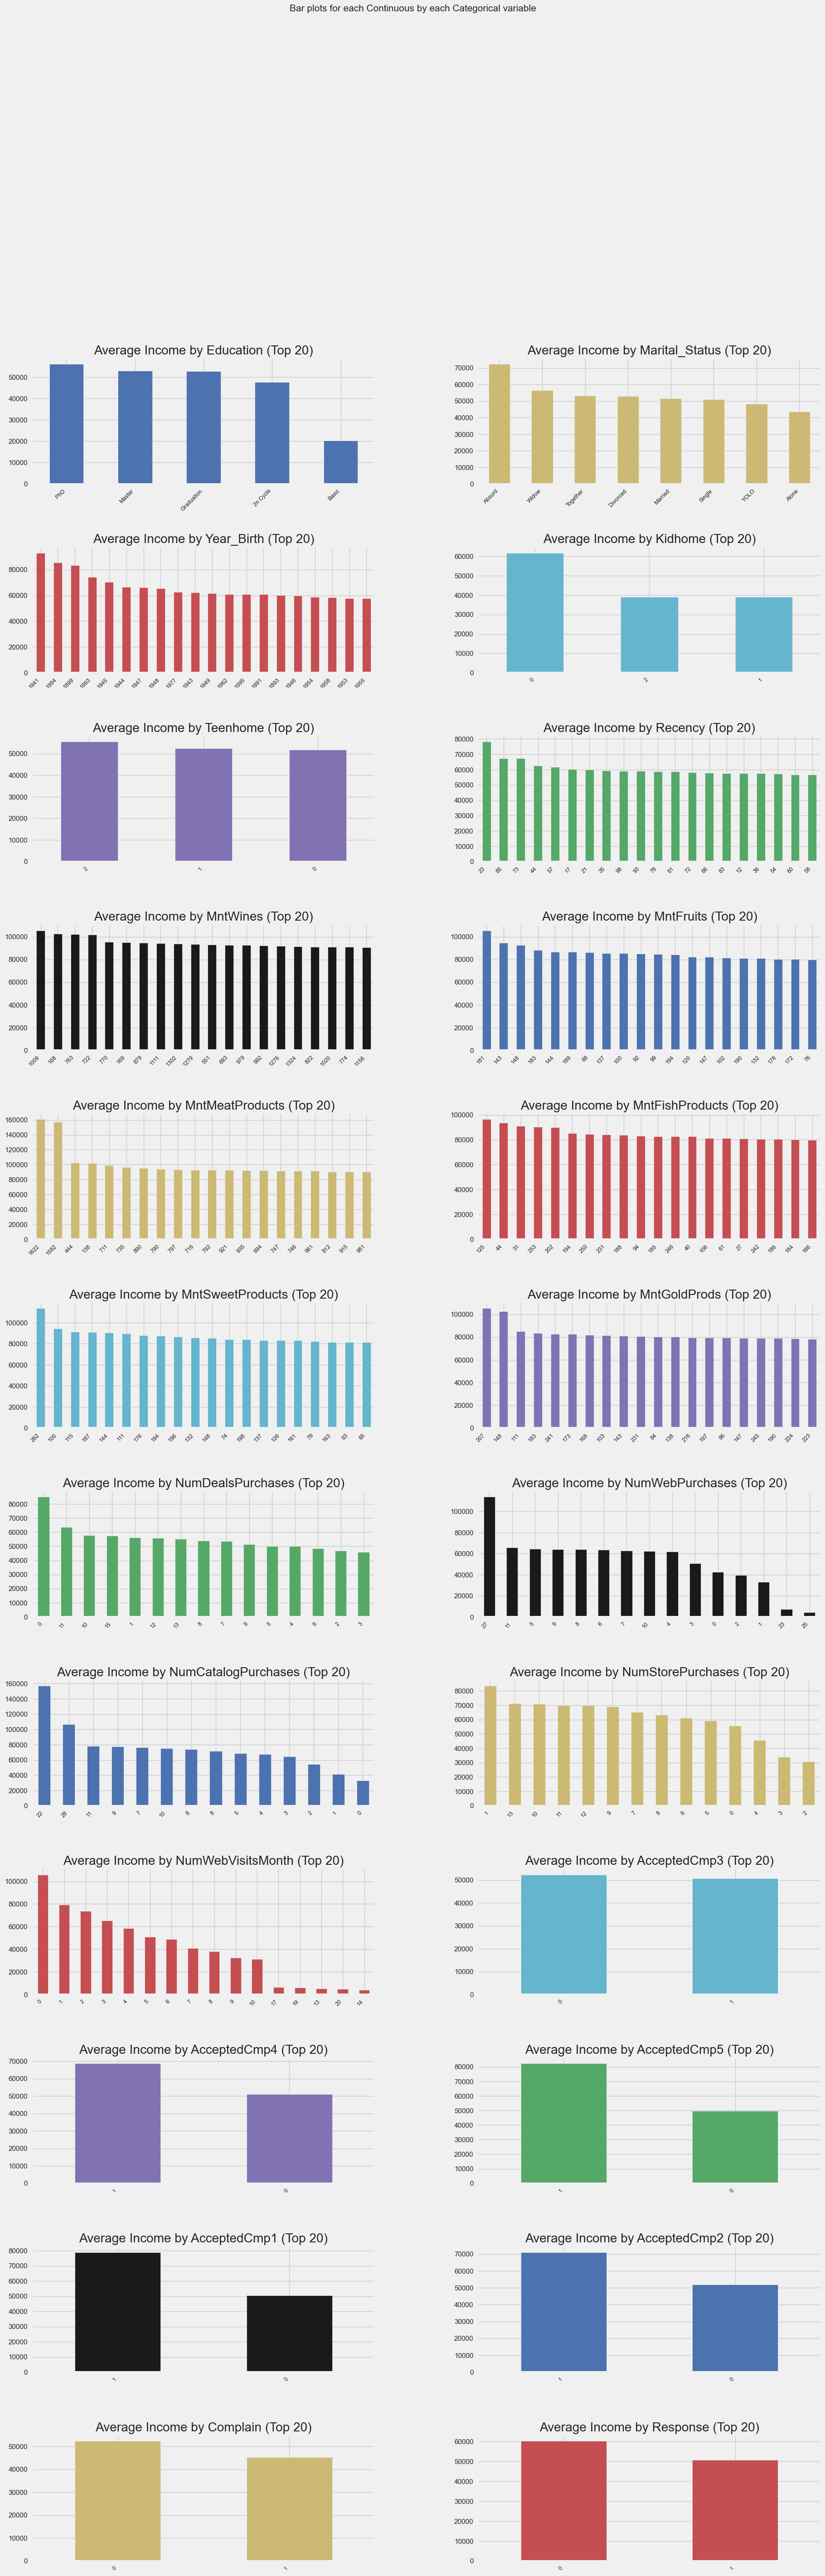

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\bb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\bb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\bb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\bb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\bb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users

Could not draw wordcloud plot for Dt_Customer
All Plots done
Time to run AutoViz = 33 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0     04-09-2012       58       635         88              546   
1     08-03-2014       38        11          1                6   
2     21-08-2013       26       426         49              127   
3     10-02-2014       26        11          4               20   
4     19-01-2014       94       173         43              118   
...          ...      ...       ...        ...              ...   
2235  13-06-2013       46       709         43              182   
2236  10-06-2014       56       406          0               30   
2237  25-01-2014       91       908         48              217   
2238  24-01-2014        8       428         30              214   
2239  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7             0             0   

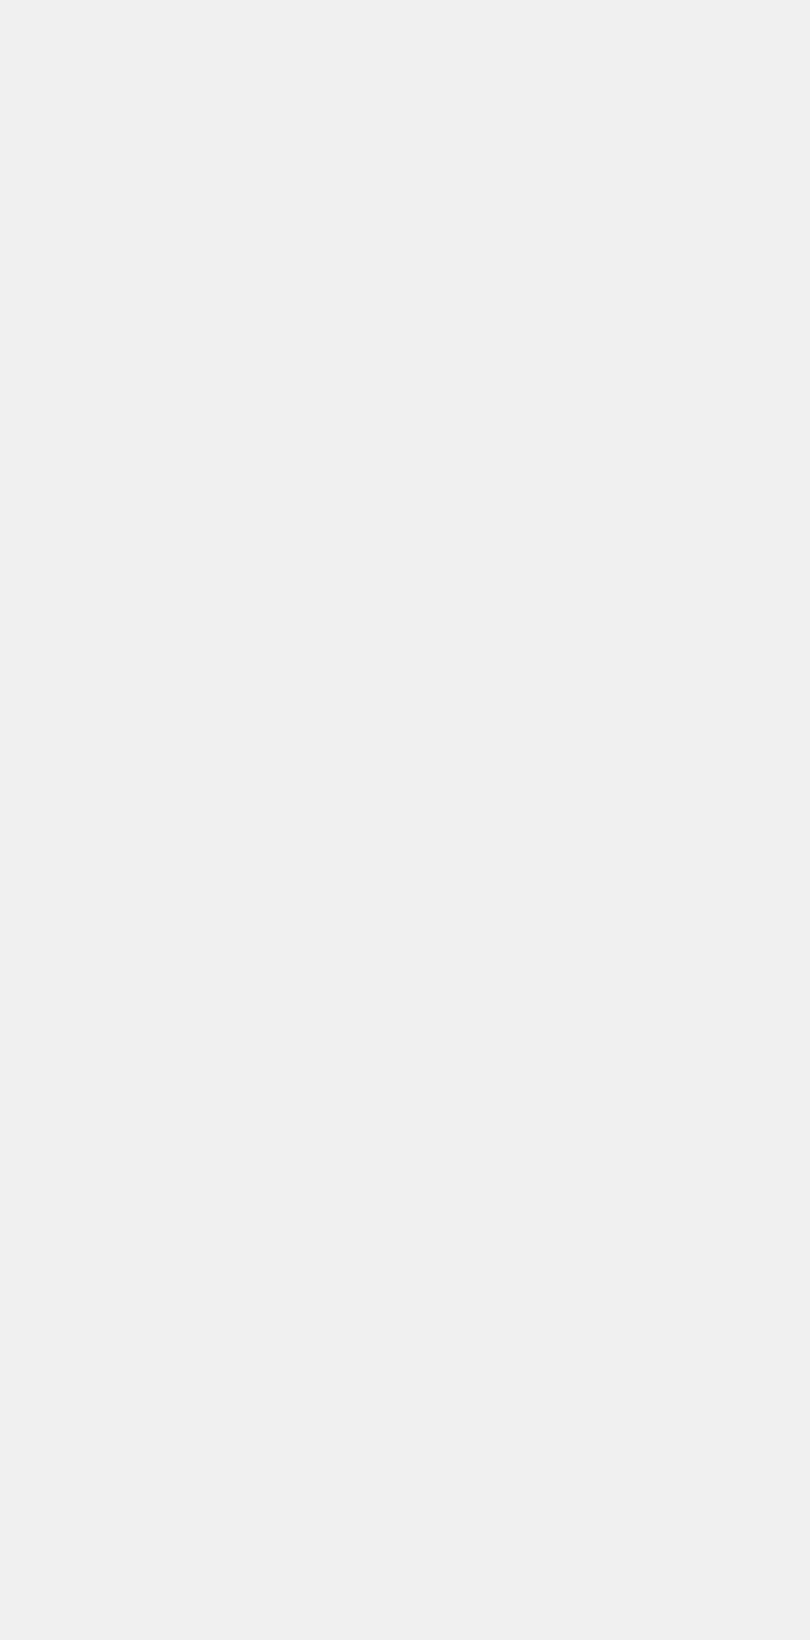

In [62]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

%matplotlib inline 

# Generate visualizations
AV.AutoViz(filename = "marketing_campaign.csv", sep = '\t', depVar='Response', header=0, verbose=1, lowess=False, chart_format='png')

In [64]:
from autoviz import data_cleaning_suggestions
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


### Data preprocessing

In [145]:
df1 = df.copy()

In [146]:
df1.drop(columns = ["Year_Birth","Dt_Customer","Total_Amount_Spent"],inplace=True)

In [147]:
X = df1.drop(columns="Response")
X = pd.get_dummies(X)

Y = df1["Response"]

In [148]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [149]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=0.2, random_state=2023, stratify=Y)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=2023, stratify=y_temp)


print(X_train.shape, X_val.shape, X_test.shape)

(1232, 35) (411, 35) (411, 35)


In [150]:
imputer = SimpleImputer(strategy="median")

In [151]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [152]:
X_train.isna().any()
X_val.isna().any()
X_test.isna().any()

Income                     False
Kidhome                    False
Teenhome                   False
Recency                    False
MntWines                   False
MntFruits                  False
MntMeatProducts            False
MntFishProducts            False
MntSweetProducts           False
MntGoldProds               False
NumDealsPurchases          False
NumWebPurchases            False
NumCatalogPurchases        False
NumStorePurchases          False
NumWebVisitsMonth          False
AcceptedCmp3               False
AcceptedCmp4               False
AcceptedCmp5               False
AcceptedCmp1               False
AcceptedCmp2               False
Complain                   False
Z_CostContact              False
Z_Revenue                  False
Age                        False
Registration_year          False
Registration_month         False
Registration_week          False
Education_Basic            False
Education_Graduation       False
Education_Master           False
Education_

In [153]:
criteria = make_scorer(accuracy_score)

In [154]:
def model_performance(model, predictors, target):
    
    # predicting using the independent variable
    pred = model.predict(predictors)

    accuracy = accuracy_score(target, pred)  
    recall = recall_score(target, pred)  
    precision = precision_score(target, pred)  
    f1 = f1_score(target, pred)  
    
    df_metrics = pd.DataFrame({
        "Metric": ["Accuracy", "Recall", "Precision", "F1"],
        "Score": [accuracy, recall, precision, f1]
    })

    return df_metrics

In [155]:
def model_confusion_matrix(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)

    plt.figure(figsize=(12, 7))
    sns.heatmap(
        cm,
        annot=True,
        cmap="vlag",
        xticklabels=["Negative", "Positive"],
        yticklabels=["Negative", "Positive"],
        fmt="d",
    )
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion Matrix")

    plt.show()

In [156]:
models = { 
    "Bagging": BaggingClassifier(random_state=2023),
    "Random forest": RandomForestClassifier(random_state=2023),
    "dtree": DecisionTreeClassifier(random_state=2023),
    "GBM": GradientBoostingClassifier(random_state=2023),
    "Adaboost": AdaBoostClassifier(random_state=2023)
}

results1 = {}
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)  
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=criteria, cv=kfold)
    results1[name] = cv_result.mean()
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    scores = recall_score(y_val, y_pred)
    print("{}: {}".format(name, scores))



Cross-Validation performance on training dataset:

Bagging: 0.8579737335834897
Random forest: 0.8709588229485533
dtree: 0.8116816431322208
GBM: 0.8725848392087159
Adaboost: 0.8766202560811033

Validation Performance:

Bagging: 0.30158730158730157
Random forest: 0.23809523809523808
dtree: 0.42857142857142855
GBM: 0.31746031746031744
Adaboost: 0.4444444444444444


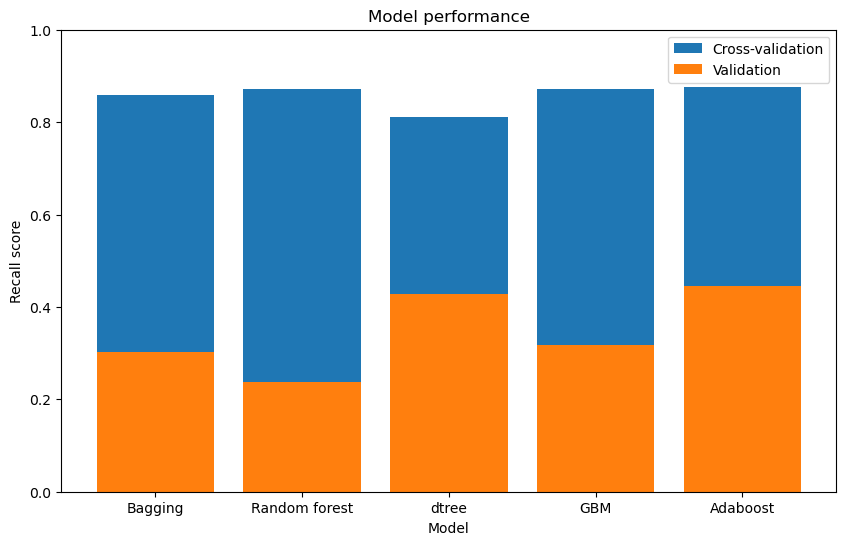

In [157]:
# get the mean cross-validation scores
cv_scores = list(results1.values())

# get the validation scores
val_scores = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = recall_score(y_val, y_pred)
    val_scores.append(score)

# plot the scores
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(list(models.keys()), cv_scores, label='Cross-validation')
ax.bar(list(models.keys()), val_scores, label='Validation')
ax.set_ylim(0, 1)
ax.set_ylabel('Recall score')
ax.set_xlabel('Model')
ax.set_title('Model performance')
ax.legend()
plt.show()

**`Adaboost`, an ensemble learning method, demonstrated better performance when utilized for targeting `response` among all other models considered above. The target variable in this scenario refers to the outcome or response that the marketing campaign aims to predict or influence, such as whether a customer will respond positively to a specific offer or advertisement.**

## Part 2: Clustering to summarize customer segments.

In [304]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import *
from datetime import date, datetime

In [279]:
df2 = pd.read_csv("marketing_campaign.csv", sep = '\t', index_col = 'ID', parse_dates = ['Dt_Customer'])

In [280]:
df2.head(10)

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                        
5524        1957  Graduation         Single  58138.0        0         0   
2174        1954  Graduation         Single  46344.0        1         1   
4141        1965  Graduation       Together  71613.0        0         0   
6182        1984  Graduation       Together  26646.0        1         0   
5324        1981         PhD        Married  58293.0        1         0   
7446        1967      Master       Together  62513.0        0         1   
965         1971  Graduation       Divorced  55635.0        0         1   
6177        1985         PhD        Married  33454.0        1         0   
4855        1974         PhD       Together  30351.0        1         0   
5899        1950         PhD       Together   5648.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                
5524  2012-04-09       58       635         88              546   
2174  2014-08-03       38        11          1                6   
4141  2013-08-21       26       426         49              127   
6182  2014-10-02       26        11          4               20   
5324  2014-01-19       94       173         43              118   
7446  2013-09-09       16       520         42               98   
965   2012-11-13       34       235         65              164   
6177  2013-08-05       32        76         10               56   
4855  2013-06-06       19        14          0               24   
5899  2014-03-13       68        28          0                6   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                         
5524              172                88            88                  3   
2174                2                 1             6                  2   
4141              111                21            42                  1   
6182               10                 3             5                  2   
5324               46                27            15                  5   
7446                0                42            14                  2   
965                50                49            27                  4   
6177                3                 1            23                  2   
4855                3                 3             2                  1   
5899                1                 1            13                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                              
5524                8                   10                  4   
2174                1                    1                  2   
4141                8                    2                 10   
6182                2                    0                  4   
5324                5                    3                  6   
7446                6                    4                 10   
965                 7                    3                  7   
6177                4                    0                  4   
4855                3                    0                  2   
5899                1                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                  
5524                  7             0             0             0   
2174                  5             0             0             0   
4141                  4             0             0             0   
6182                  6             0             0             0   
5324                  5             0             0             0   
7446                  6             0             0             0   
965                   6             0             0   

In [281]:
df2.dropna()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                         
5524         1957  Graduation         Single  58138.0        0         0   
2174         1954  Graduation         Single  46344.0        1         1   
4141         1965  Graduation       Together  71613.0        0         0   
6182         1984  Graduation       Together  26646.0        1         0   
5324         1981         PhD        Married  58293.0        1         0   
...           ...         ...            ...      ...      ...       ...   
10870        1967  Graduation        Married  61223.0        0         1   
4001         1946         PhD       Together  64014.0        2         1   
7270         1981  Graduation       Divorced  56981.0        0         0   
8235         1956      Master       Together  69245.0        0         1   
9405         1954         PhD        Married  52869.0        1         1   

      Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                 
5524   2012-04-09       58       635         88              546   
2174   2014-08-03       38        11          1                6   
4141   2013-08-21       26       426         49              127   
6182   2014-10-02       26        11          4               20   
5324   2014-01-19       94       173         43              118   
...           ...      ...       ...        ...              ...   
10870  2013-06-13       46       709         43              182   
4001   2014-10-06       56       406          0               30   
7270   2014-01-25       91       908         48              217   
8235   2014-01-24        8       428         30              214   
9405   2012-10-15       40        84          3               61   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                          
5524               172                88            88                  3   
2174                 2                 1             6                  2   
4141               111                21            42                  1   
6182                10                 3             5                  2   
5324                46                27            15                  5   
...                ...               ...           ...                ...   
10870               42               118           247                  2   
4001                 0                 0             8                  7   
7270                32                12            24                  1   
8235                80                30            61                  2   
9405                 2                 1            21                  3   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                               
5524                 8                   10                  4   
2174                 1                    1                  2   
4141                 8                    2                 10   
6182                 2                    0                  4   
5324                 5                    3                  6   
...                ...                  ...                ...   
10870                9                    3                  4   
4001                 8                    2                  5   
7270                 2                    3                 13   
8235                 6                    5                 10   
9405                 3                    1                  4   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                   
5524                   7             0             0             0   
2174                   5             0             0          

In [282]:
# Define a function to calculate age from birth year
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# Apply the function to create the "Age" column
df2["Age"] = df2["Year_Birth"].apply(lambda x: calculate_age(date(x, 1, 1)))

# Sort the "Age" column in ascending order
df2["Age"] = df2["Age"].sort_values()
df2.Age

ID
5524     66
2174     69
4141     58
6182     39
5324     42
         ..
10870    56
4001     77
7270     42
8235     67
9405     69
Name: Age, Length: 2240, dtype: int64

In [283]:
df2["Total_Spent"] = df2["MntWines"]+ df2["MntFruits"]+ df2["MntMeatProducts"]+ df2["MntFishProducts"]+ df2["MntSweetProducts"]+ df2["MntGoldProds"]

In [284]:
record_date = []
for var in df2["Dt_Customer"]:
    var_str = var.strftime("%Y-%m-%d") # convert Timestamp object to string
    var_datetime = datetime.strptime(var_str, "%Y-%m-%d") # convert string to datetime object
    record_date.append(var_datetime.date())

# Dates of the newest and oldest entry date
newest_date = max(record_date) # store the newest date in a variable
oldest_date = min(record_date) # store the oldest date in a variable
print("The newest customer's entry date in the records:", newest_date)
print("The oldest customer's entry date in the records:", oldest_date)

The newest customer's entry date in the records: 2014-12-06
The oldest customer's entry date in the records: 2012-01-08


In [285]:
# Create a feature "Customer_duration"
days = []
for date in record_date:
    diff = (newest_date - date).days # calculate the difference in days
    days.append(diff)
df2["Customer_duration"] = days
df2["Customer_duration"] = pd.to_numeric(df2["Customer_duration"], errors="coerce")

In [286]:
df2["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [287]:
#Living condition based on marital status - "Alone"
df2["Living_status"]=df2["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})
df2["Living_status"]

ID
5524       Alone
2174       Alone
4141     Partner
6182     Partner
5324     Partner
          ...   
10870    Partner
4001     Partner
7270       Alone
8235     Partner
9405     Partner
Name: Living_status, Length: 2240, dtype: object

In [288]:
#Feature indicating total children living in the household
df2["Children"]=df2["Kidhome"]+df2["Teenhome"]

In [289]:
df2["Family_Size"] = df2["Living_status"].replace({"Alone": 1, "Partner":2})+ df2["Children"]

In [290]:
df2["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [291]:
df2["Education"]=df2["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [292]:
#Feature pertaining parenthood
df2["Parenthood"] = np.where(df2.Children> 0, 1, 0)

In [293]:
df2=df2.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [294]:
df2 = df2.drop(columns = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"], axis=1)

In [295]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   Wines                2240 non-null   int64  
 6   Fruits               2240 non-null   int64  
 7   Meat                 2240 non-null   int64  
 8   Fish                 2240 non-null   int64  
 9   Sweets               2240 non-null   int64  
 10  Gold                 2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null 

<Figure size 1000x800 with 0 Axes>

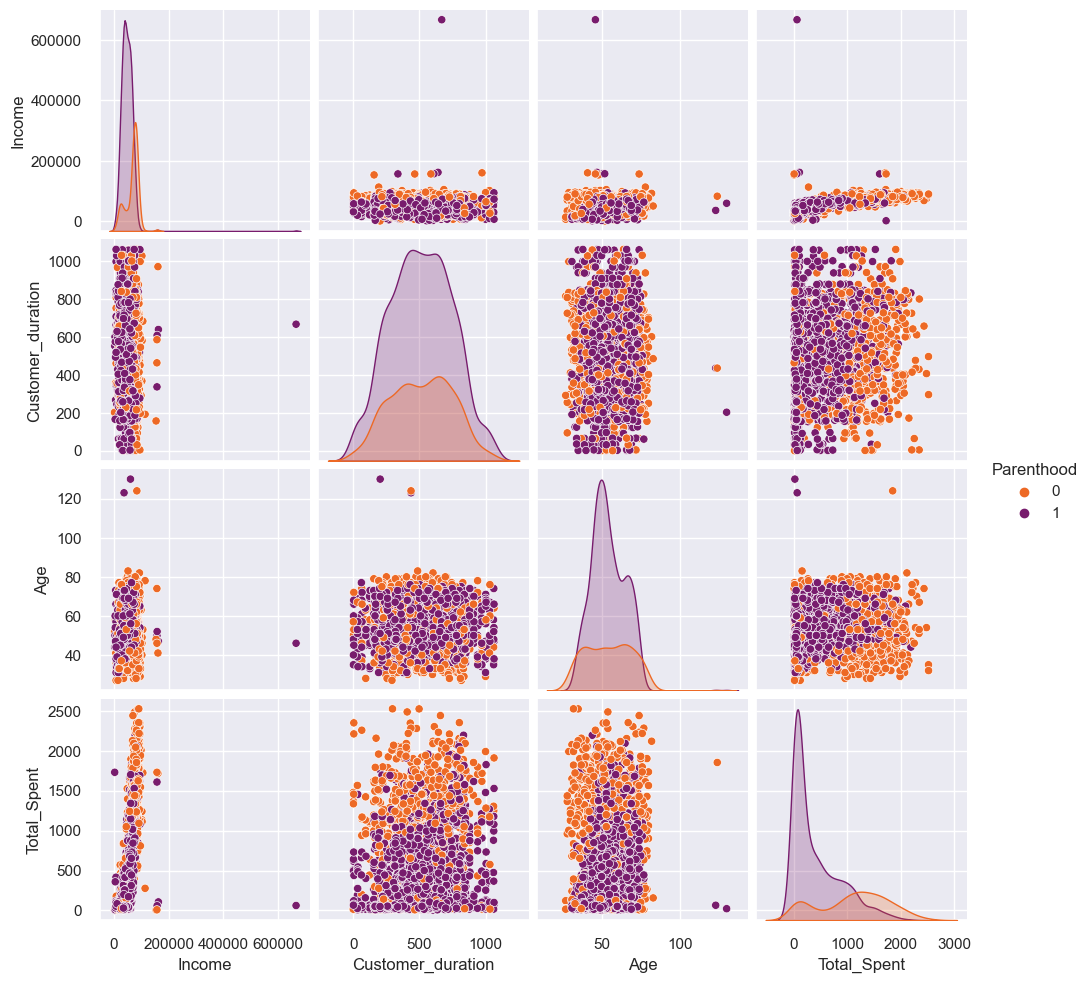

In [303]:
# Use the "darkgrid" style
sns.set_style("darkgrid")

# Plot the selected features 
plt.figure(figsize=(10,8))
To_Plot = [ "Income", "Customer_duration", "Age", "Total_Spent", "Parenthood"]
sns.pairplot(df2[To_Plot], hue="Parenthood", palette="inferno_r")
plt.show()

In [305]:
#Dropping the outliers by setting a cap on Age and income. 
df2 = df2[(df2["Age"]<90)]
df2 = df2[(df2["Income"]<600000)]
print("The total number of observations after removing the outliers are:", len(df2))

The total number of observations after removing the outliers are: 2212


<AxesSubplot:>

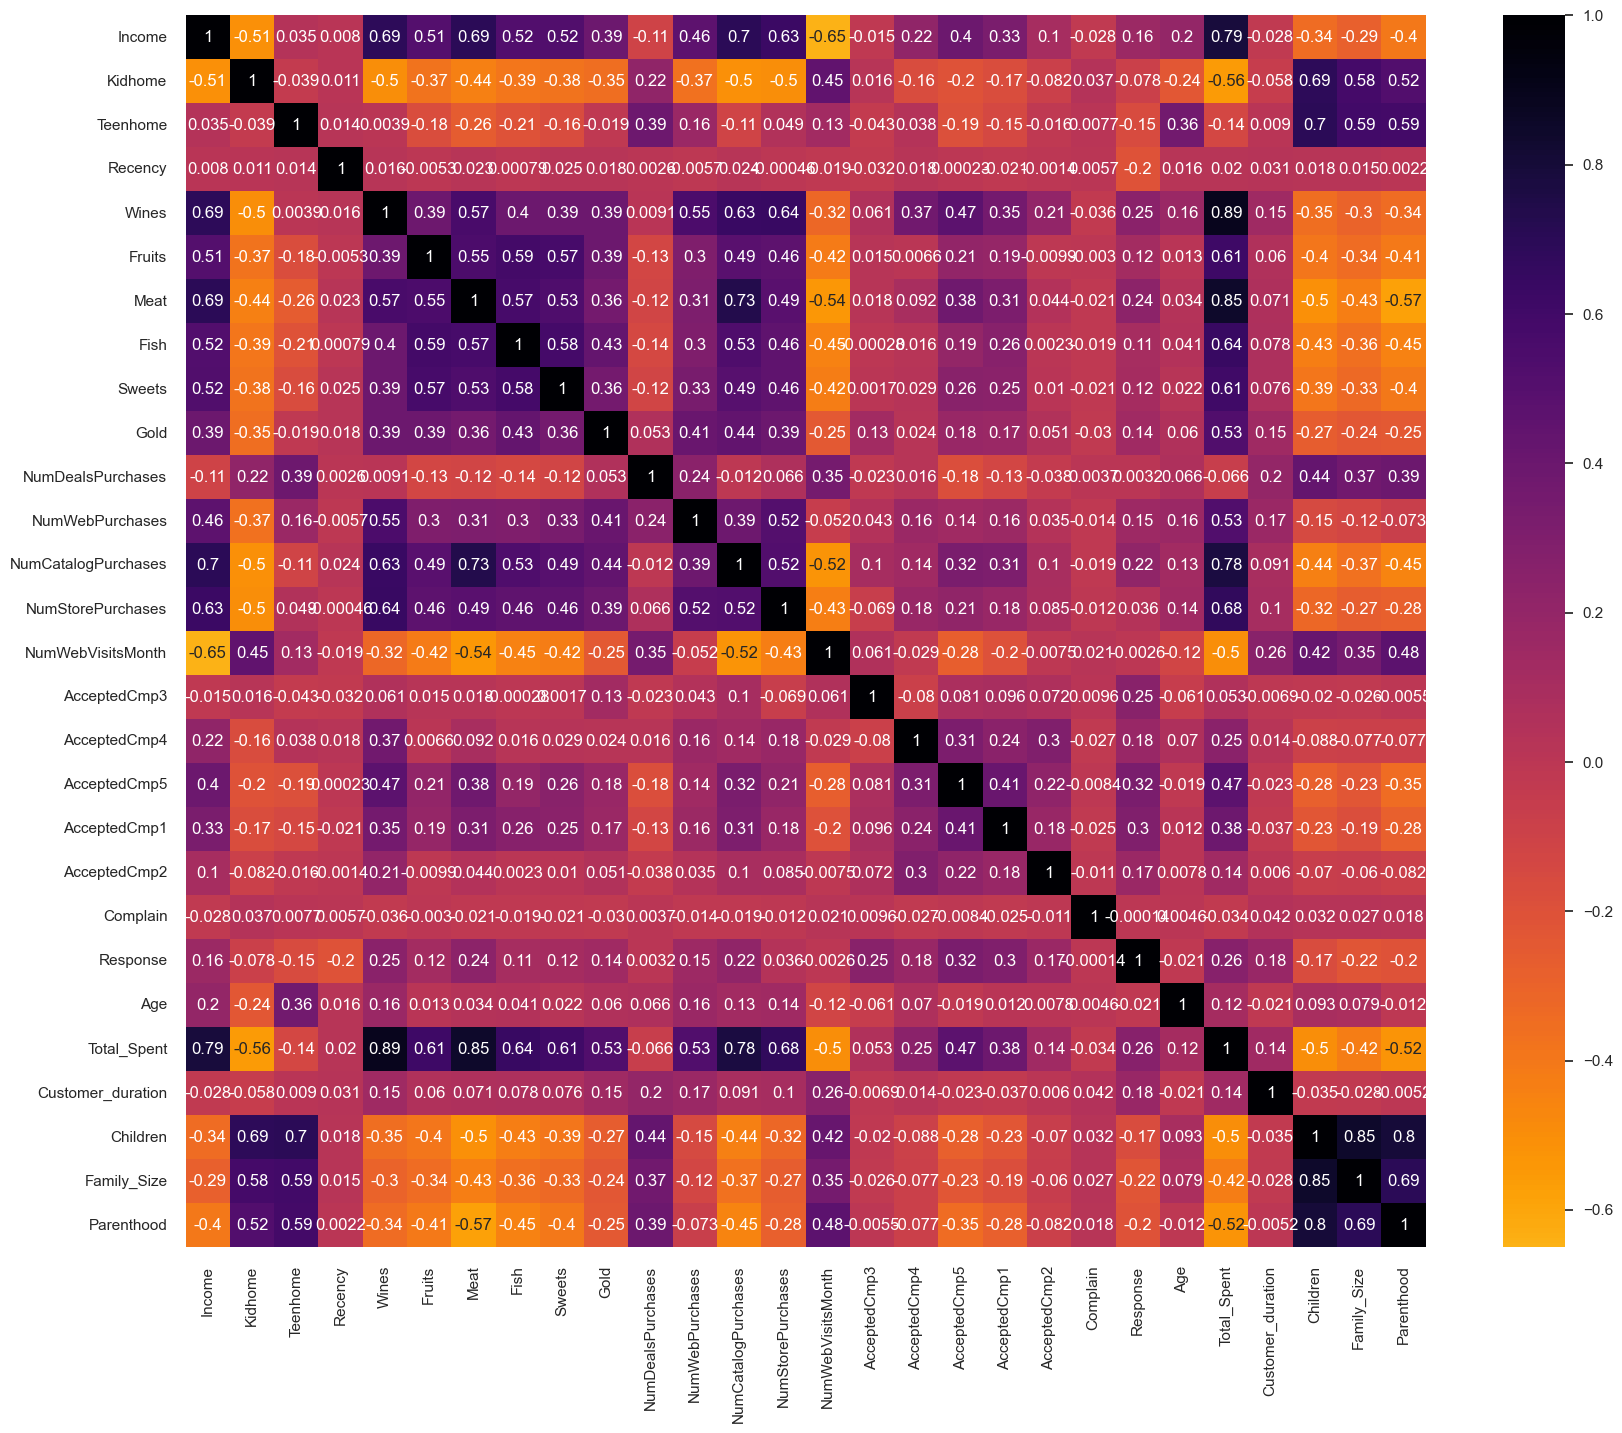

In [311]:
#correlation matrix
correlation_matrix = df2.corr()
plt.figure(figsize=(20,16))  
sns.heatmap(correlation_matrix,annot=True, cmap="inferno_r", center=0)

### Data Preprocessing

In [312]:
#list of categorical variables
i = (df2.dtypes == 'object')
object_cols = list(i[i].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_status']


In [314]:
#Label Encoding the object dtypes.
le = LabelEncoder()
for j in object_cols:
    df2[j]=df2[[j]].apply(le.fit_transform)
    
print("All features are numerical now")

All features are numerical now


In [315]:
#Creating a copy of data
df3 = df2.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_to_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df3 = df3.drop(cols_to_del, axis=1)

#Applying Standard Scaling
scaler = StandardScaler()
scaler.fit(df3)
scaled_df = pd.DataFrame(scaler.transform(df3),columns= df3.columns )
print("All features are now scaled")

All features are now scaled


In [316]:
scaled_df.head(10)

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   
5   0.571657  0.490381 -0.822754  0.908097 -1.141097  0.636663  0.394373   
6  -0.893586  0.170807 -0.822754  0.908097 -0.519047 -0.208416  0.973207   
7   0.571657 -0.859793  1.040021 -0.929699 -0.588164 -0.679881 -0.410961   
8   0.571657 -1.003968  1.040021 -0.929699 -1.037422 -0.863722 -0.662628   
9   0.571657 -2.151748  1.040021  0.908097  0.655937 -0.822210 -0.662628   

       Meat      Fish    Sweets      Gold  NumDealsPurchases  NumWebPurchases  \
0  1.690293  2.453472  1.483713  0.852576           0.351030         1.426865   
1 -0.718230 -0.651004 -0.634019 -0.733642          -0.168701        -1.126420   
2 -0.178542  1.339513 -0.147184 -0.037254          -0.688432         1.426865   
3 -0.655787 -0.504911 -0.585335 -0.752987          -0.168701        -0.761665   
4 -0.218684  0.152508 -0.001133 -0.559545           1.390492         0.332600   
5 -0.307889 -0.687527  0.363993 -0.578889          -0.168701         0.697355   
6 -0.013514  0.225554  0.534385 -0.327416           0.870761         1.062110   
7 -0.495218 -0.632742 -0.634019 -0.404792          -0.168701        -0.032155   
8 -0.637946 -0.632742 -0.585335 -0.811019          -0.688432        -0.396910   
9 -0.718230 -0.669265 -0.634019 -0.598234          -0.688432        -1.126420   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       Age  \
0             2.503607          -0.555814           0.692181  1.018352   
1            -0.571340          -1.171160          -0.132545  1.274785   
2            -0.229679           1.290224          -0.544908  0.334530   
3            -0.913000          -0.555814           0.279818 -1.289547   
4             0.111982           0.059532          -0.132545 -1.033114   
5             0.453643           1.290224           0.279818  0.163575   
6             0.111982           0.367205           0.279818 -0.178336   
7            -0.913000          -0.555814           1.104543 -1.375024   
8            -0.913000          -1.171160           1.516906 -0.434769   
9            -0.913000          -1.786506           6.052898  1.616696   

   Total_Spent  Customer_duration  Living_status  Children  Family_Size  \
0     1.676245           1.973583      -1.349603 -1.264598    -1.758359   
1    -0.963297          -1.665144      -1.349603  1.404572     0.449070   
2     0.280110          -0.172664       0.740959 -1.264598    -0.654644   
3    -0.920135          -1.923210       0.740959  0.069987     0.449070   
4    -0.307562          -0.822130       0.740959  0.069987     0.449070   
5     0.180505          -0.254385       0.740959  0.069987     0.449070   
6    -0.028667           1.035944      -1.349603  0.069987    -0.654644   
7    -0.727564          -0.103847       0.740959  0.069987     0.449070   
8    -0.931755           0.154219       0.740959  0.069987     0.449070   
9    -0.926775          -1.050088       0.740959  1.404572     1.552784   

   Parenthood  
0   -1.581139  
1    0.632456  
2   -1.581139  
3    0.632456  
4    0.632456  
5    0.632456  
6    0.632456  
7    0.632456  
8    0.632456  
9    0.632456

In [318]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
pca_df = pd.DataFrame(pca.transform(scaled_df), columns=(["PCA_1","PCA_2", "PCA_3"]))
pca_df.describe().T

count          mean       std       min       25%       50%       75%  \
PCA_1  2212.0 -8.833601e-17  2.878377 -5.969395 -2.538494 -0.780421  2.383290   
PCA_2  2212.0  9.706923e-17  1.706839 -4.312154 -1.328327 -0.158199  1.242271   
PCA_3  2212.0  4.715436e-17  1.221956 -3.529849 -0.829077 -0.022352  0.799345   

            max  
PCA_1  7.444305  
PCA_2  6.142728  
PCA_3  6.614367

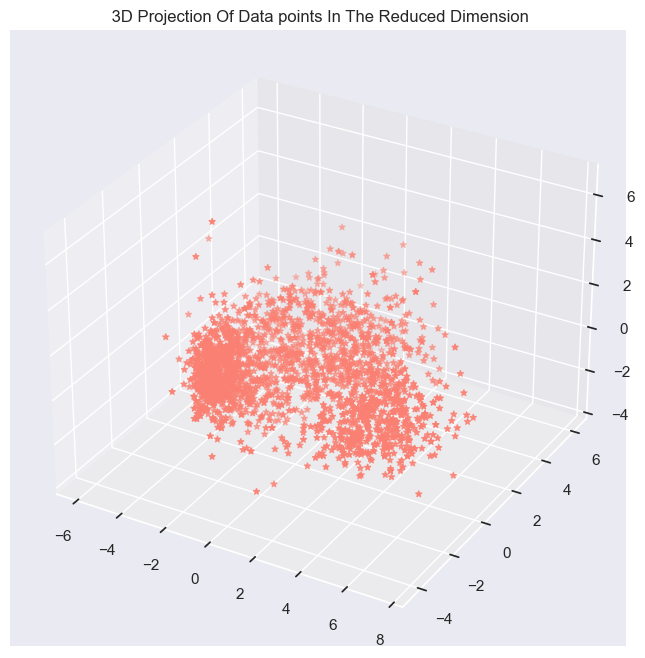

In [322]:
#3D Projection Of Data In The Reduced Dimension
x = pca_df["PCA_1"]
y = pca_df["PCA_2"]
z = pca_df["PCA_3"]

#To plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="salmon", marker="*" )
ax.set_title(" 3D Projection Of Data points In The Reduced Dimension")
plt.show()

## Clustering using Agglomerative clustering 

- Elbow Method to determine the number of clusters to be formed
- Clustering via Agglomerative Clustering
- Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


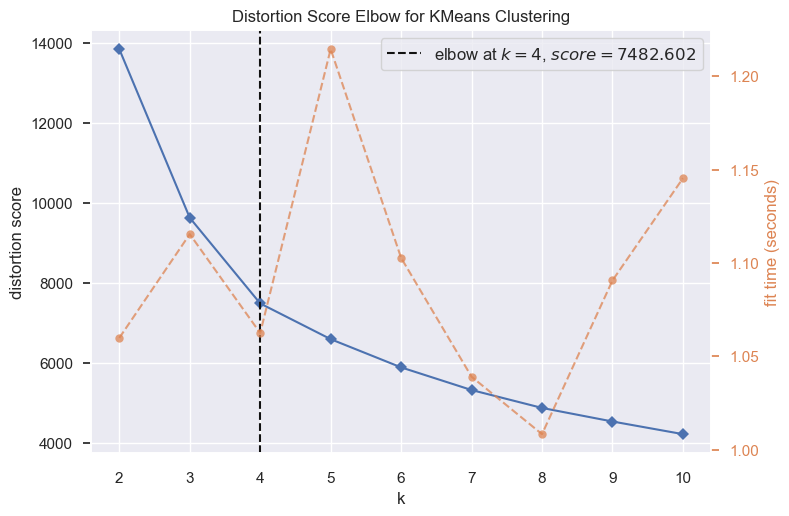

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [324]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')

Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(pca_df)
Elbow.show()

**The above graph indicates that four will be an optimal number of clusters for this data.**

In [325]:
#Initiating the Agglomerative Clustering model 
cluster = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
model = cluster.fit_predict(pca_df)
pca_df["Clusters"] = model

#Adding the Clusters feature to the orignal dataframe.
df2["Clusters"]= model

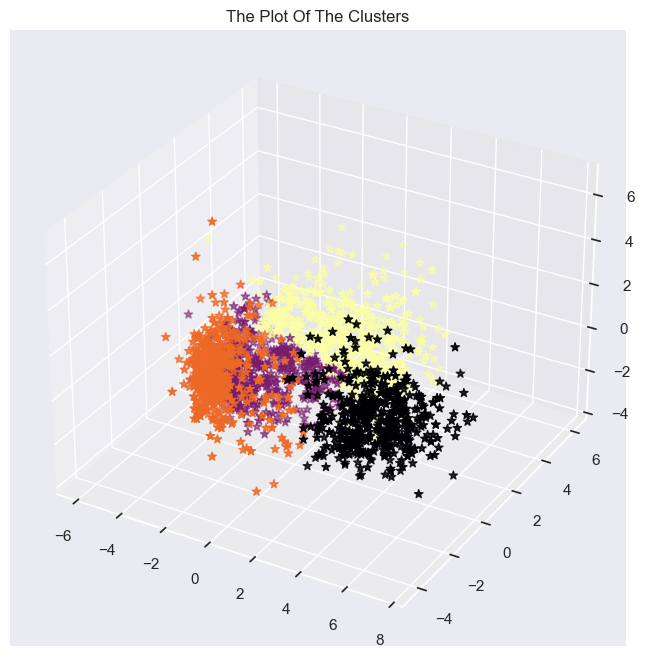

In [326]:
#Plotting the clusters
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_df["Clusters"], marker='*', cmap = "inferno_r" )
ax.set_title("The Plot Of The Clusters")
plt.show()

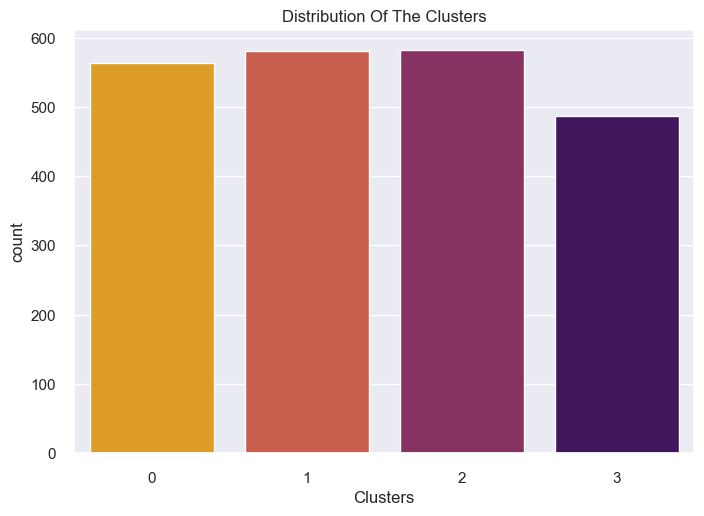

In [330]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df2["Clusters"], palette= "inferno_r")
pl.set_title("Distribution Of The Clusters")
plt.show()

**The clusters seem to be fairly distributed.**

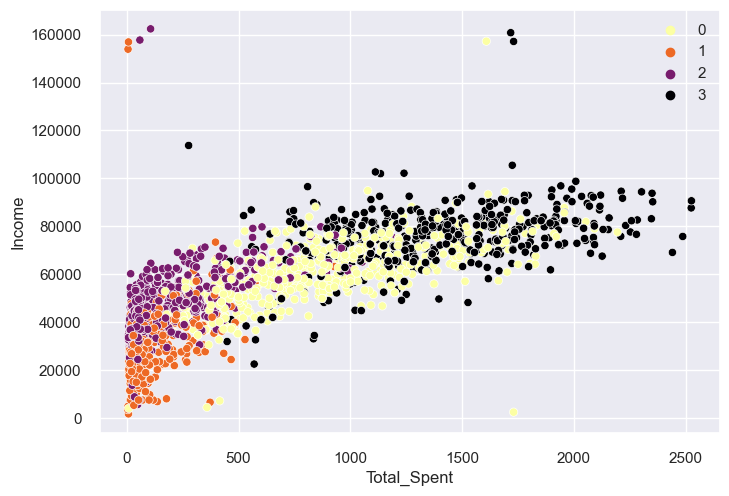

In [331]:
fig = sns.scatterplot(data = df2,x=df2["Total_Spent"], y=df2["Income"],hue=df2["Clusters"], palette= "inferno_r")
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**Income vs spending plot shows the clusters pattern**

- `group 0`: high spending & average income
- `group 1`: high spending & high income
- `group 2`: low spending & low income
- `group 3`: high spending & low income

**Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold**

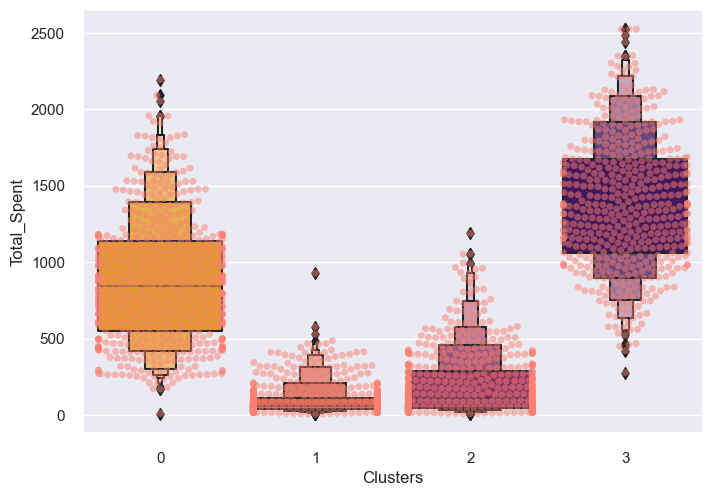

In [334]:
plt.figure()
fig = sns.swarmplot(x=df2["Clusters"], y=df2["Total_Spent"], color= "salmon", alpha=0.5 )
fig = sns.boxenplot(x=df2["Clusters"], y=df2["Total_Spent"], palette= "inferno_r")
plt.show()

**From the above plot, it can be clearly seen that `cluster 3` is our biggest set of customers closely followed by `cluster 0`. We can explore what each cluster is spending on for the targeted marketing strategies.**

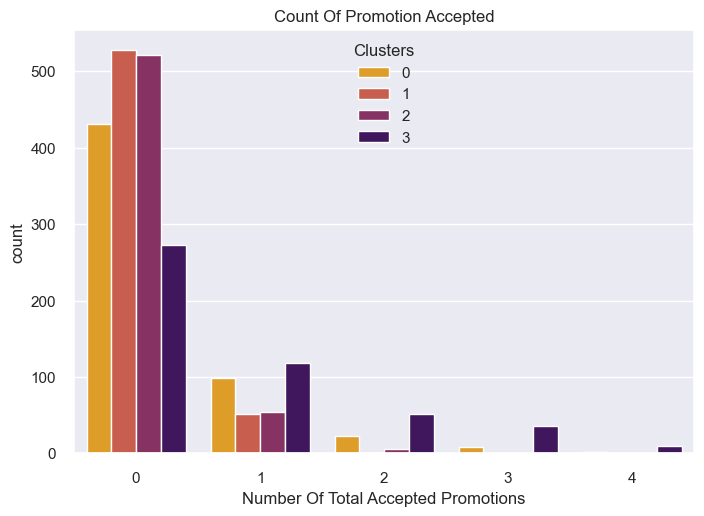

In [336]:
#Creating a feature to get a sum of accepted promotions 
df2["Total_Promotions"] = df2["AcceptedCmp1"]+ df2["AcceptedCmp2"]+ df2["AcceptedCmp3"]+ df2["AcceptedCmp4"]+ df2["AcceptedCmp5"]

#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df2["Total_Promotions"],hue=df2["Clusters"], palette= "inferno_r")
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

**There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.**

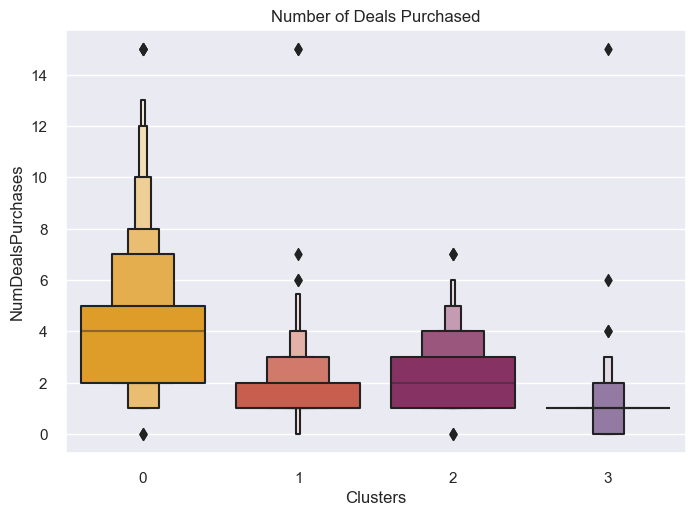

In [337]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df2["NumDealsPurchases"],x=df2["Clusters"], palette= "inferno_r")
pl.set_title("Number of Deals Purchased")
plt.show()

**Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 1 & 2. However, our star customers cluster 3 are not much into the deals.**

**PROFILING**

***Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team***

In [338]:
df2.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'Total_Spent', 'Customer_duration', 'Living_status', 'Children',
       'Family_Size', 'Parenthood', 'Clusters', 'Total_Promotions'],
      dtype='object')

<Figure size 800x550 with 0 Axes>

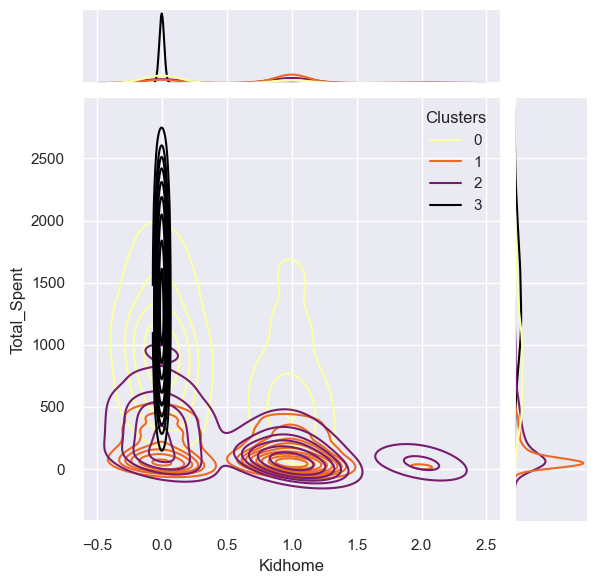

<Figure size 800x550 with 0 Axes>

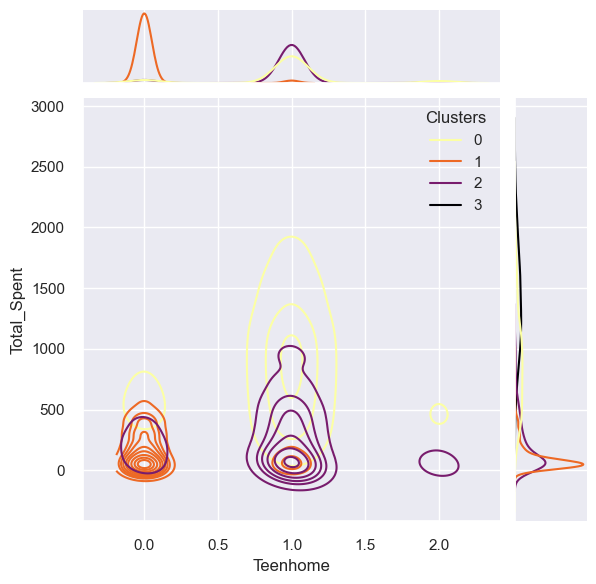

<Figure size 800x550 with 0 Axes>

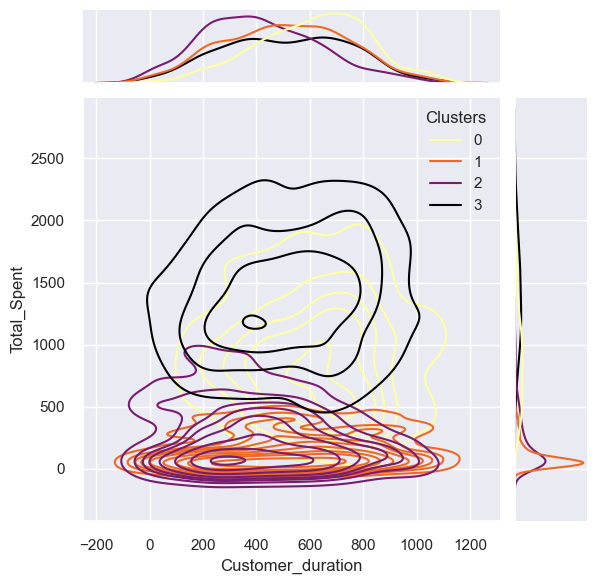

<Figure size 800x550 with 0 Axes>

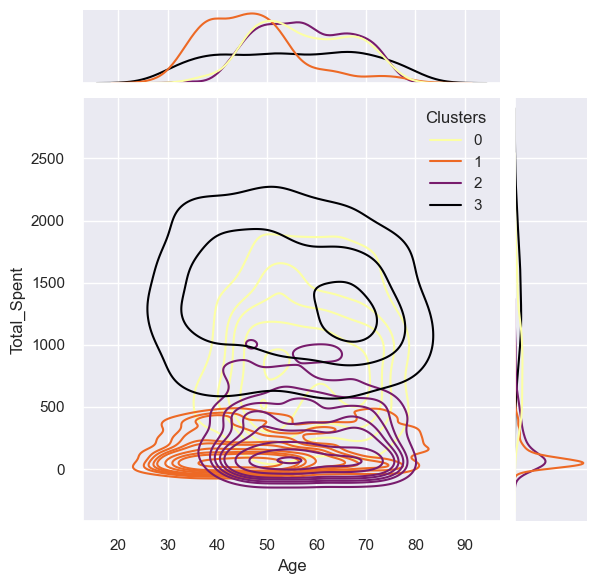

<Figure size 800x550 with 0 Axes>

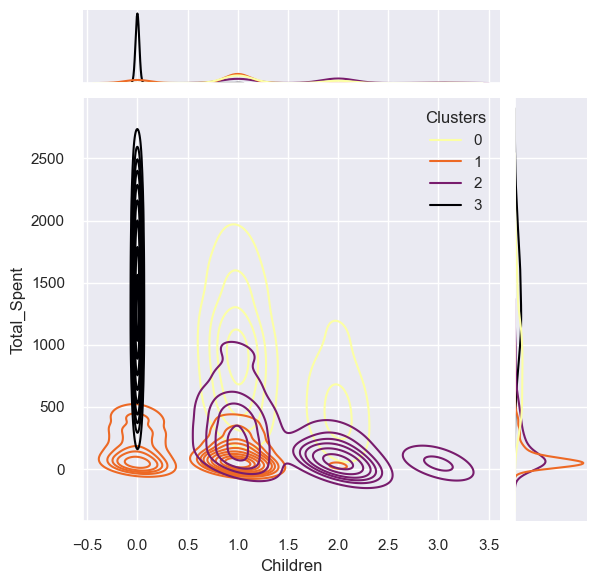

<Figure size 800x550 with 0 Axes>

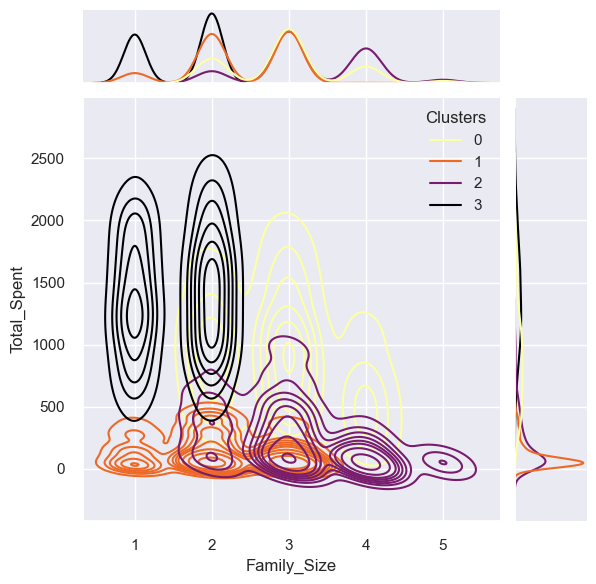

<Figure size 800x550 with 0 Axes>

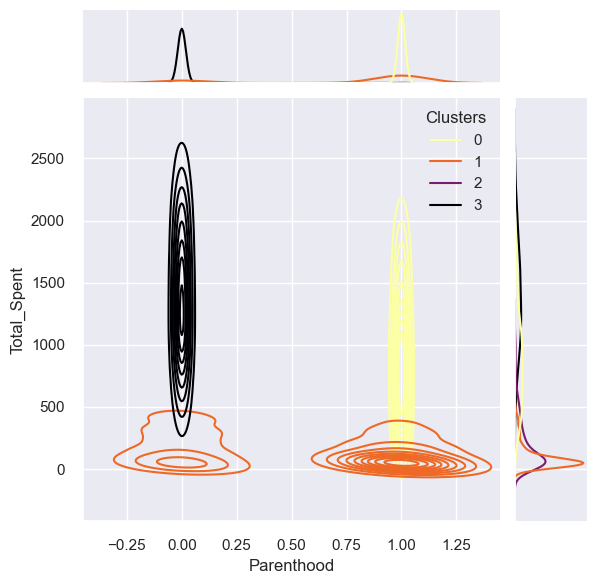

<Figure size 800x550 with 0 Axes>

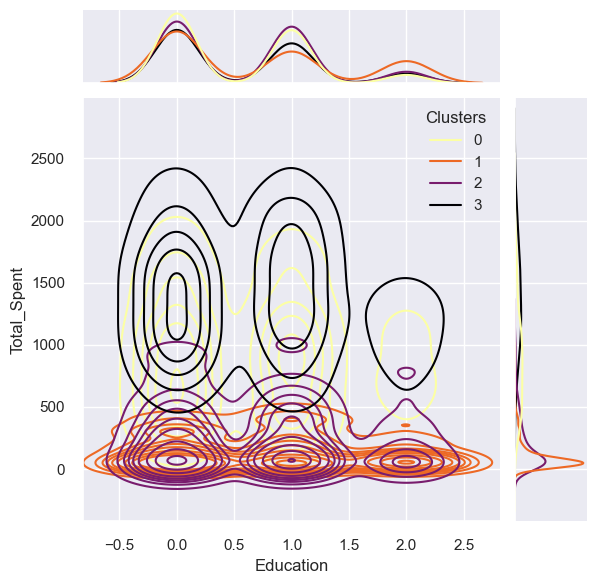

<Figure size 800x550 with 0 Axes>

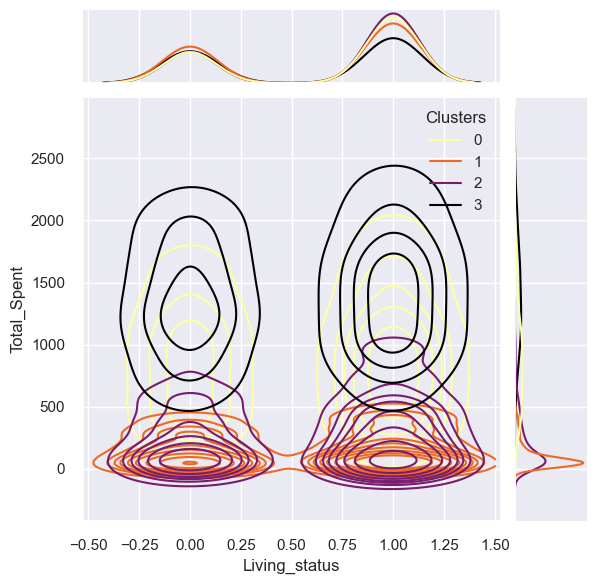

In [339]:
profiling = [ "Kidhome","Teenhome","Customer_duration", "Age", "Children", "Family_Size", "Parenthood", "Education","Living_status"]

for k in profiling:
    plt.figure()
    sns.jointplot(x=df2[k], y=df2["Total_Spent"], hue = df2["Clusters"], kind="kde", palette="inferno_r")
    plt.show()

**Points to be noted**
- For cluster 0 : definetely a parent, may include single parents, comparatively older population
- For cluster 1 : not a parent, majorly single, high income bracket
- For cluster 2 : mostly parent, with 1 or more kids, younger population
- For cluster 3 : parent, large family size, older, population, low income bracket

- **In this project, an unsupervised clustering approach was employed to gain insights into customer segmentation. The process involved dimensionality reduction techniques, followed by agglomerative clustering to group similar customers together. Ultimately, the clustering analysis resulted in the identification of four distinct clusters.**

- **These clusters were then utilized to profile customers based on their family structures, income levels, and spending patterns. By categorizing customers into these clusters, businesses can gain a deeper understanding of their customer base and tailor marketing strategies accordingly. This segmentation approach enables the development of targeted marketing campaigns, personalized offerings, and more effective communication to meet the specific needs and preferences of each customer segment.**

- **By leveraging customer profiling through clustering analysis, businesses can optimize their marketing strategies, allocate resources efficiently, and enhance customer satisfaction and loyalty. This data-driven approach empowers businesses to make informed decisions and build stronger relationships with their customers, ultimately leading to improved business performance and growth.**